# Profiling Credit Card Customers - Cluster Visualization and Interpretation

Customer segmentation is a marketing strategy performed to group customers into subgroups based on consumer characteristics. Doing so can help companies understand their customers more deeply, improve customer experience, and increase sales.
In this project, we will be performing customer segmentation using agglomerative clustering. 
The data we will be using contains 18 features and 8950 credit card users variables. 

The dataset can be found here: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('CC General.csv')
np.random.seed(42)

In [2]:
#viewing the data
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Data Dictionary:

* CUST_ID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance given by the user
* PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASES_TRX : Numbe of purchase transactions made
* CREDIT_LIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [3]:
#viewing basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [4]:
#finding duplicates
df.duplicated().sum()

0

In [5]:
#checking for nulls
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#replacing nulls with mean values
credit_limit_mean = df['CREDIT_LIMIT'].mean()
min_payment_mean = df['MINIMUM_PAYMENTS'].mean()
df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)
df['MINIMUM_PAYMENTS'].fillna(min_payment_mean, inplace=True)

In [7]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
#viewing all columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
df.shape

(8950, 18)

In [10]:
#viewing data types
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [11]:
#dropping unnecessary columns
df.drop('CUST_ID', axis=1, inplace=True)

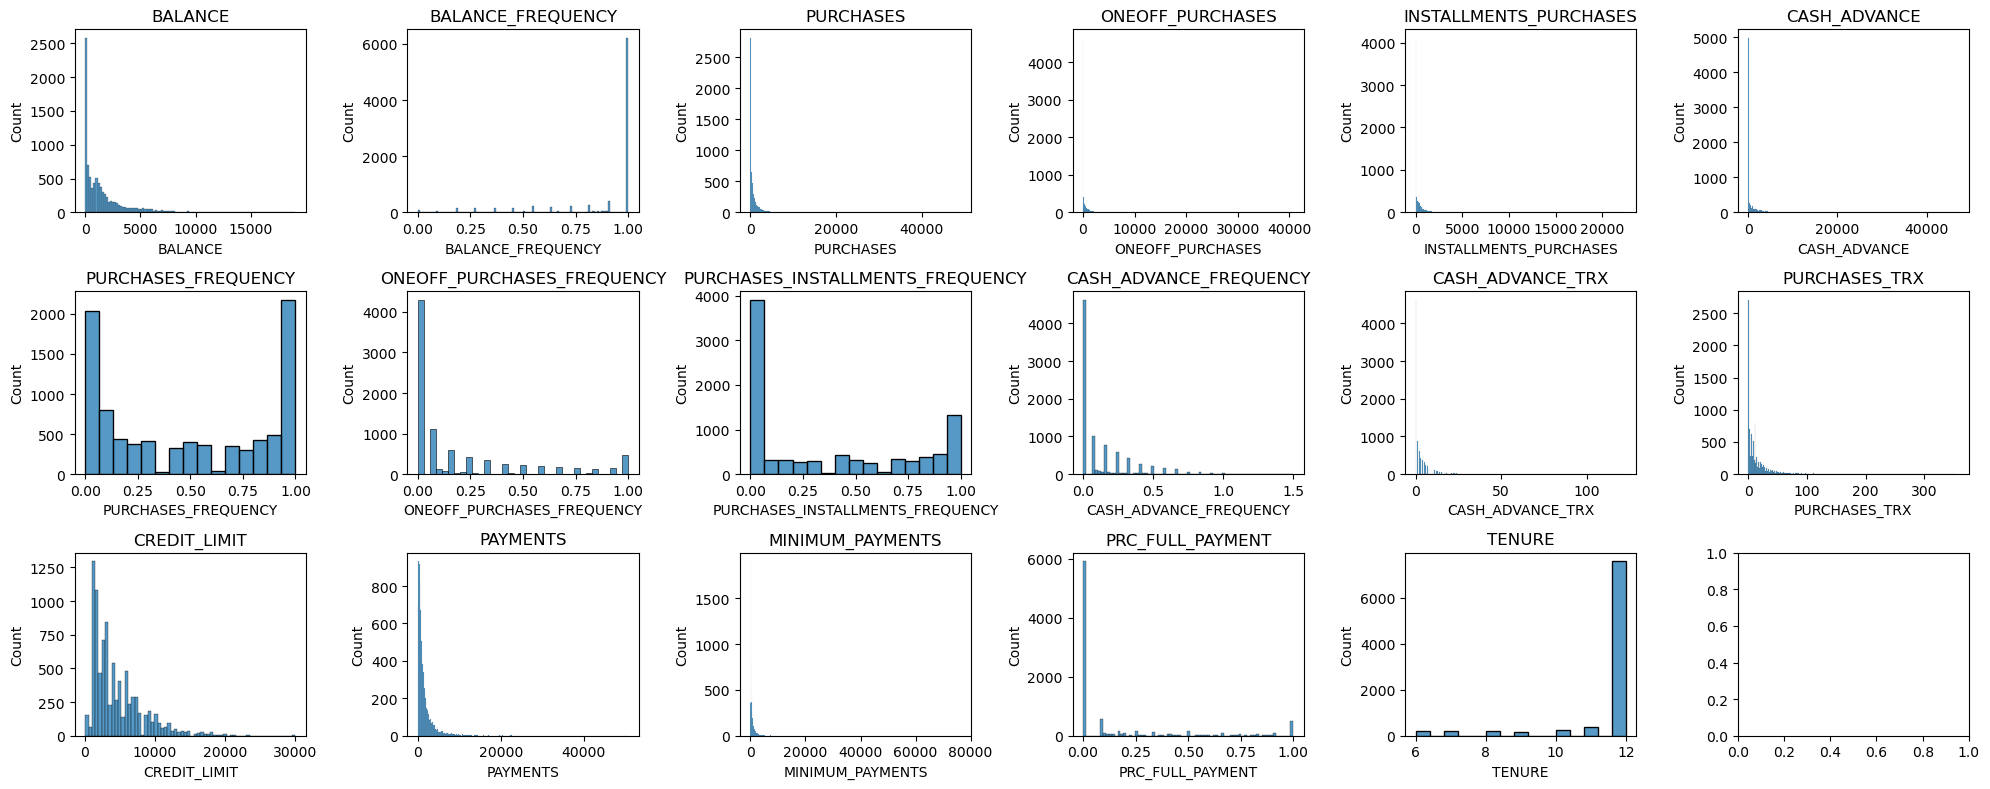

In [12]:
#viewing each features distribution
fig, axs = plt.subplots(3, 6, figsize=(20, 8))
axs = axs.flatten()
plot_index=0
for col in df:
    sns.histplot(data=df, x=col, ax=axs[plot_index])
    axs[plot_index].set_title(col)
    plot_index += 1
plt.tight_layout()
plt.show()

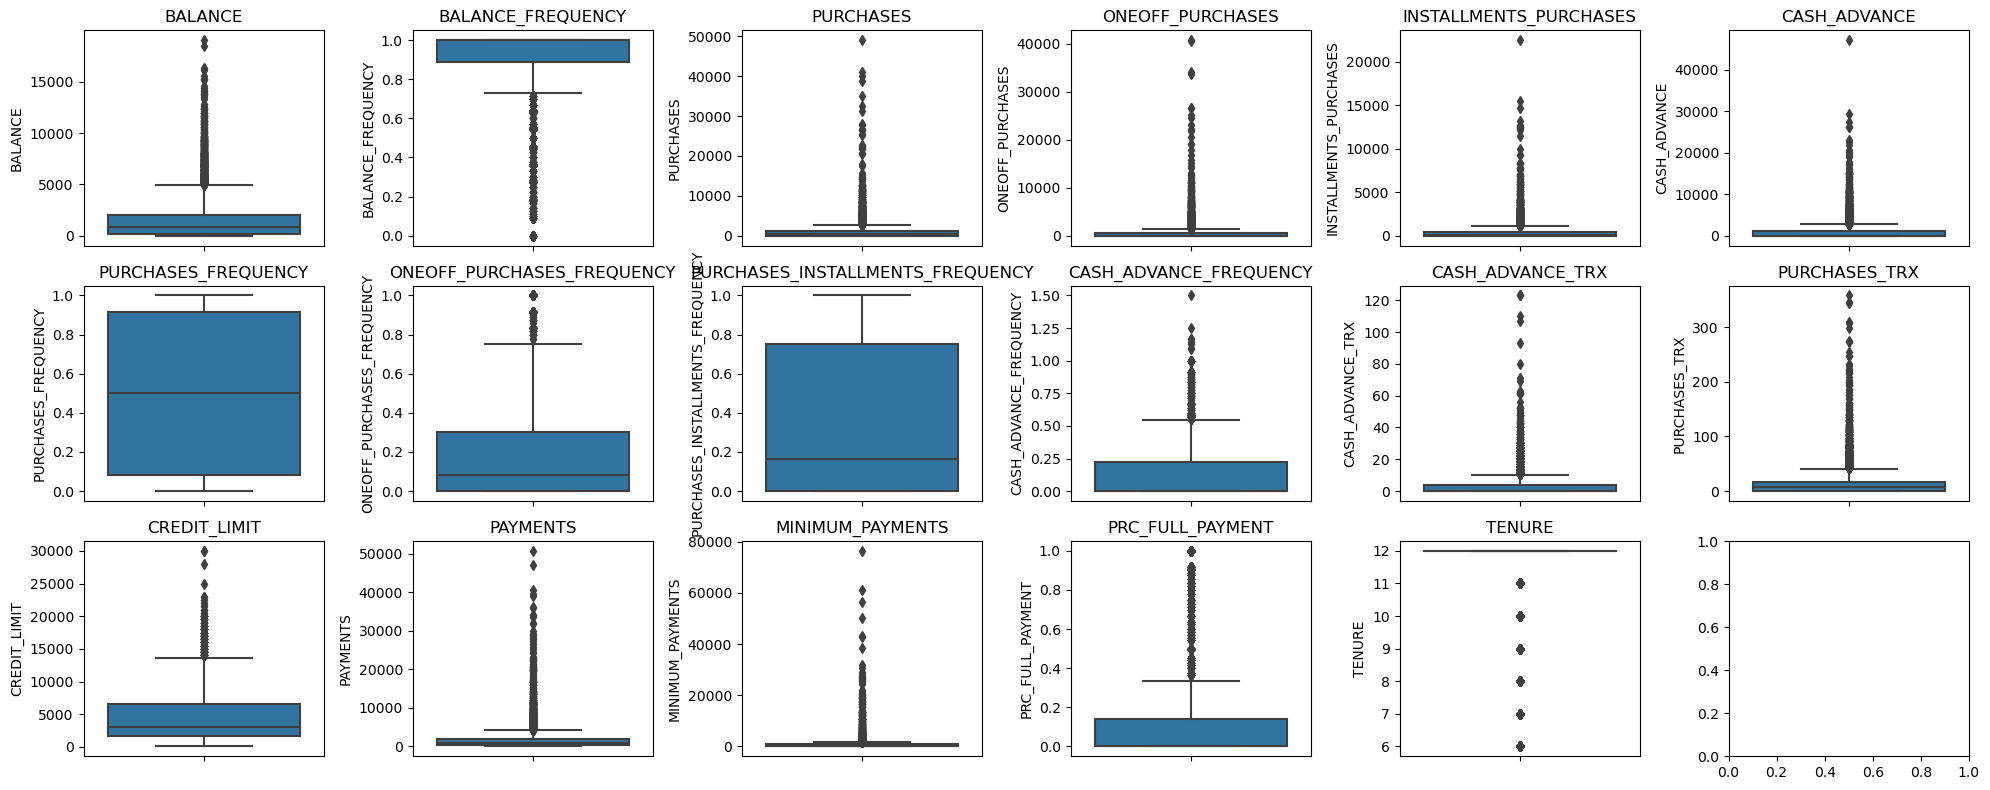

In [13]:
fig, axs = plt.subplots(3, 6, figsize=(20, 8))
axs = axs.flatten()
plot_index=0
for col in df:
    sns.boxplot(data=df, y=col, ax=axs[plot_index])
    axs[plot_index].set_title(col)
    plot_index += 1
plt.tight_layout()
plt.show()

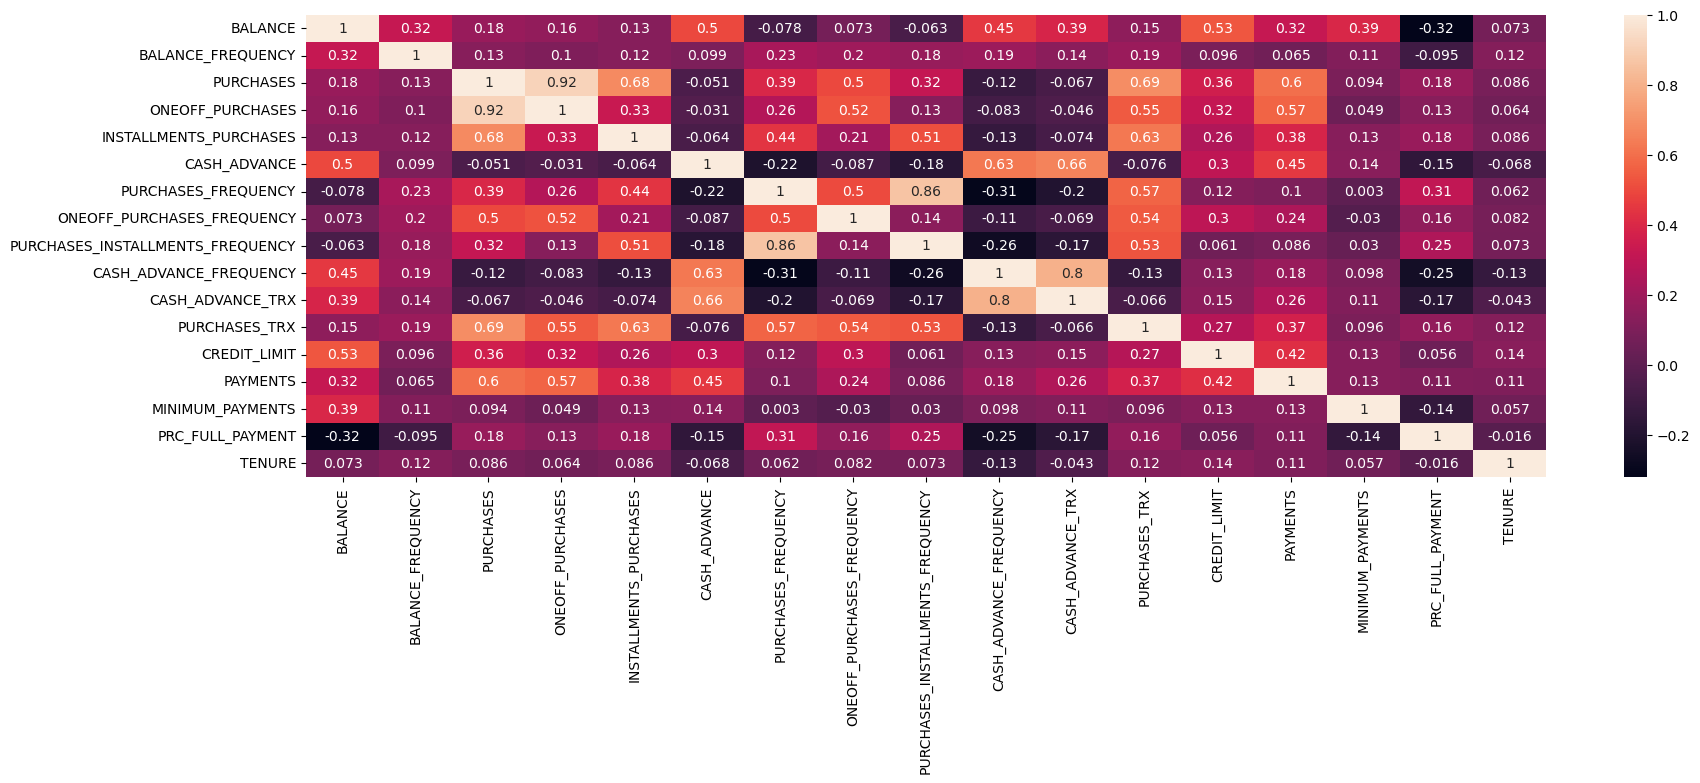

In [14]:
#viewing correlations
corr = df.corr()
fig,ax = plt.subplots(figsize=(20,6))
sns.heatmap(corr, annot=True)
plt.show()

In [15]:
df2 = df.copy()
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [16]:
#preprocessing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2)

In [17]:
scaled_df.shape

(8950, 17)

In [18]:
#performing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

In [19]:
pca_df.shape

(8950, 3)

In [20]:
pca_df = pd.DataFrame(pca_df, columns=['feature1', 'feature2', 'feature3'])
pca_df

,feature1,feature2,feature3
0,-1.682220,-1.076451,0.488511
1,-1.138295,2.506477,0.601216
2,0.969684,-0.383520,0.102374
3,-0.873628,0.043166,1.460172
4,-1.599434,-0.688581,0.365097
...,...,...,...
8945,-0.359629,-2.016145,-0.995352
8946,-0.564369,-1.639123,-1.290233
8947,-0.926204,-1.810786,-0.474720
8948,-2.336552,-0.657966,0.974725


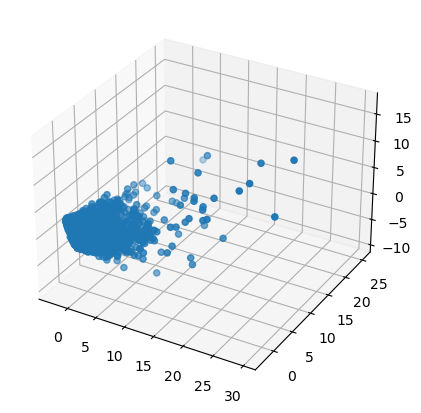

In [21]:
#viewing PCA features
x = pca_df['feature1']
y = pca_df['feature2']
z = pca_df['feature3']
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z)
plt.show()

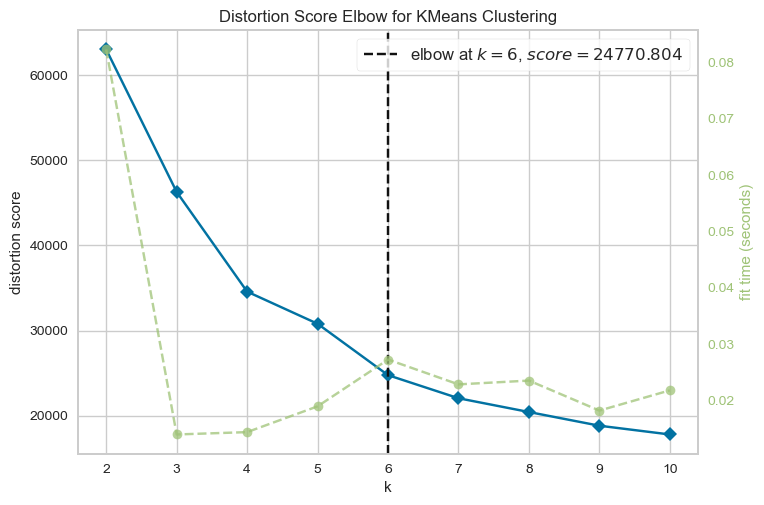

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
#finding the ideal number of clusters with Elbow plot
np.random.seed(42)
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(pca_df)
elbow.show()

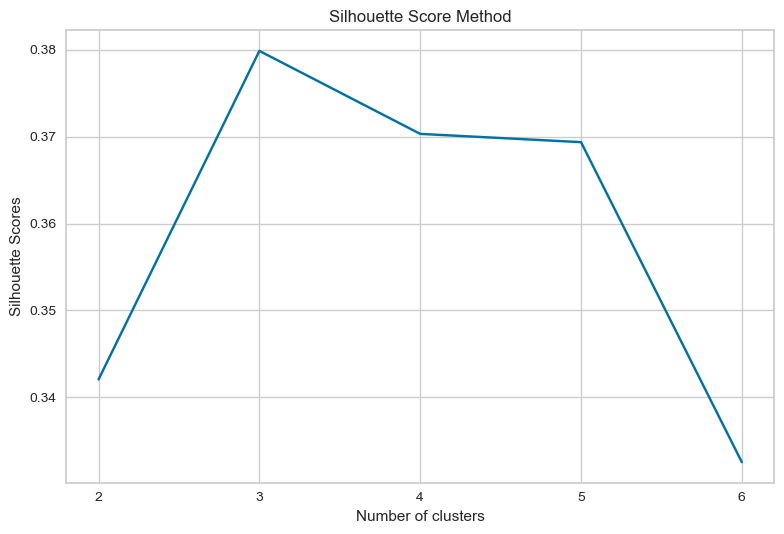

In [23]:
#verifying number of clusters with the Silhouette Score Method
np.random.seed(42)
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42)
    km.fit(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

In [24]:
#performing clustering, n_clusters=5
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5)
predict = agg.fit_predict(pca_df)
pca_df['clusters'] = predict
df2['clusters'] = predict

In [25]:
#creating a colormap
from matplotlib import colors
custom_colors=['#1f77b4','#2ca02c', '#9467bd', '#e377c2', '#bcbd22']
#, '#17becf'

# Create a ListedColormap
cmap = colors.ListedColormap(['#1f77b4','#2ca02c', '#9467bd', '#e377c2', '#bcbd22'])

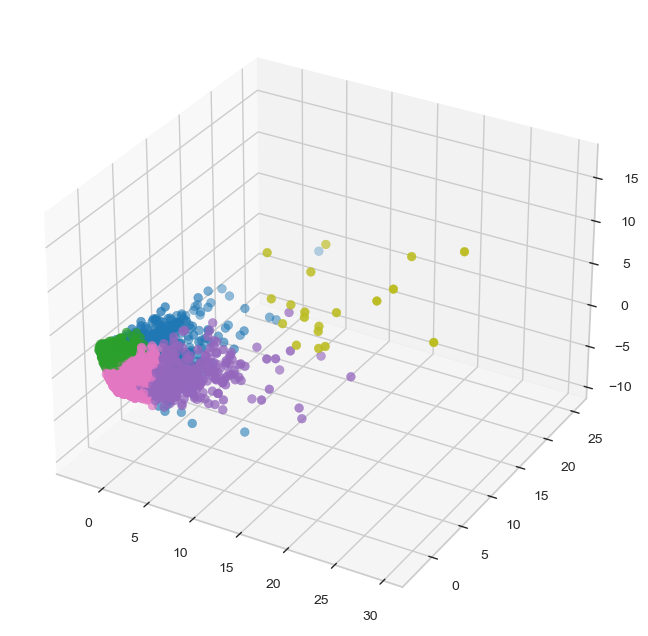

In [26]:
#plotting clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=pca_df['clusters'], marker='o', cmap=cmap)
plt.show()

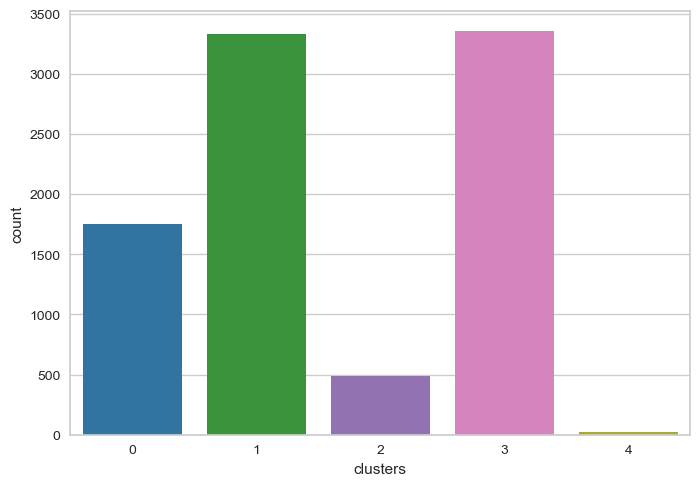

In [27]:
#viewing the size of each cluster
ax= sns.countplot(data= pca_df, x='clusters', palette=custom_colors)
abs_values = pca_df['clusters'].value_counts(ascending=False).values

In [28]:
pca_df['clusters'].value_counts()

clusters
3    3352
1    3333
0    1754
2     492
4      19
Name: count, dtype: int64

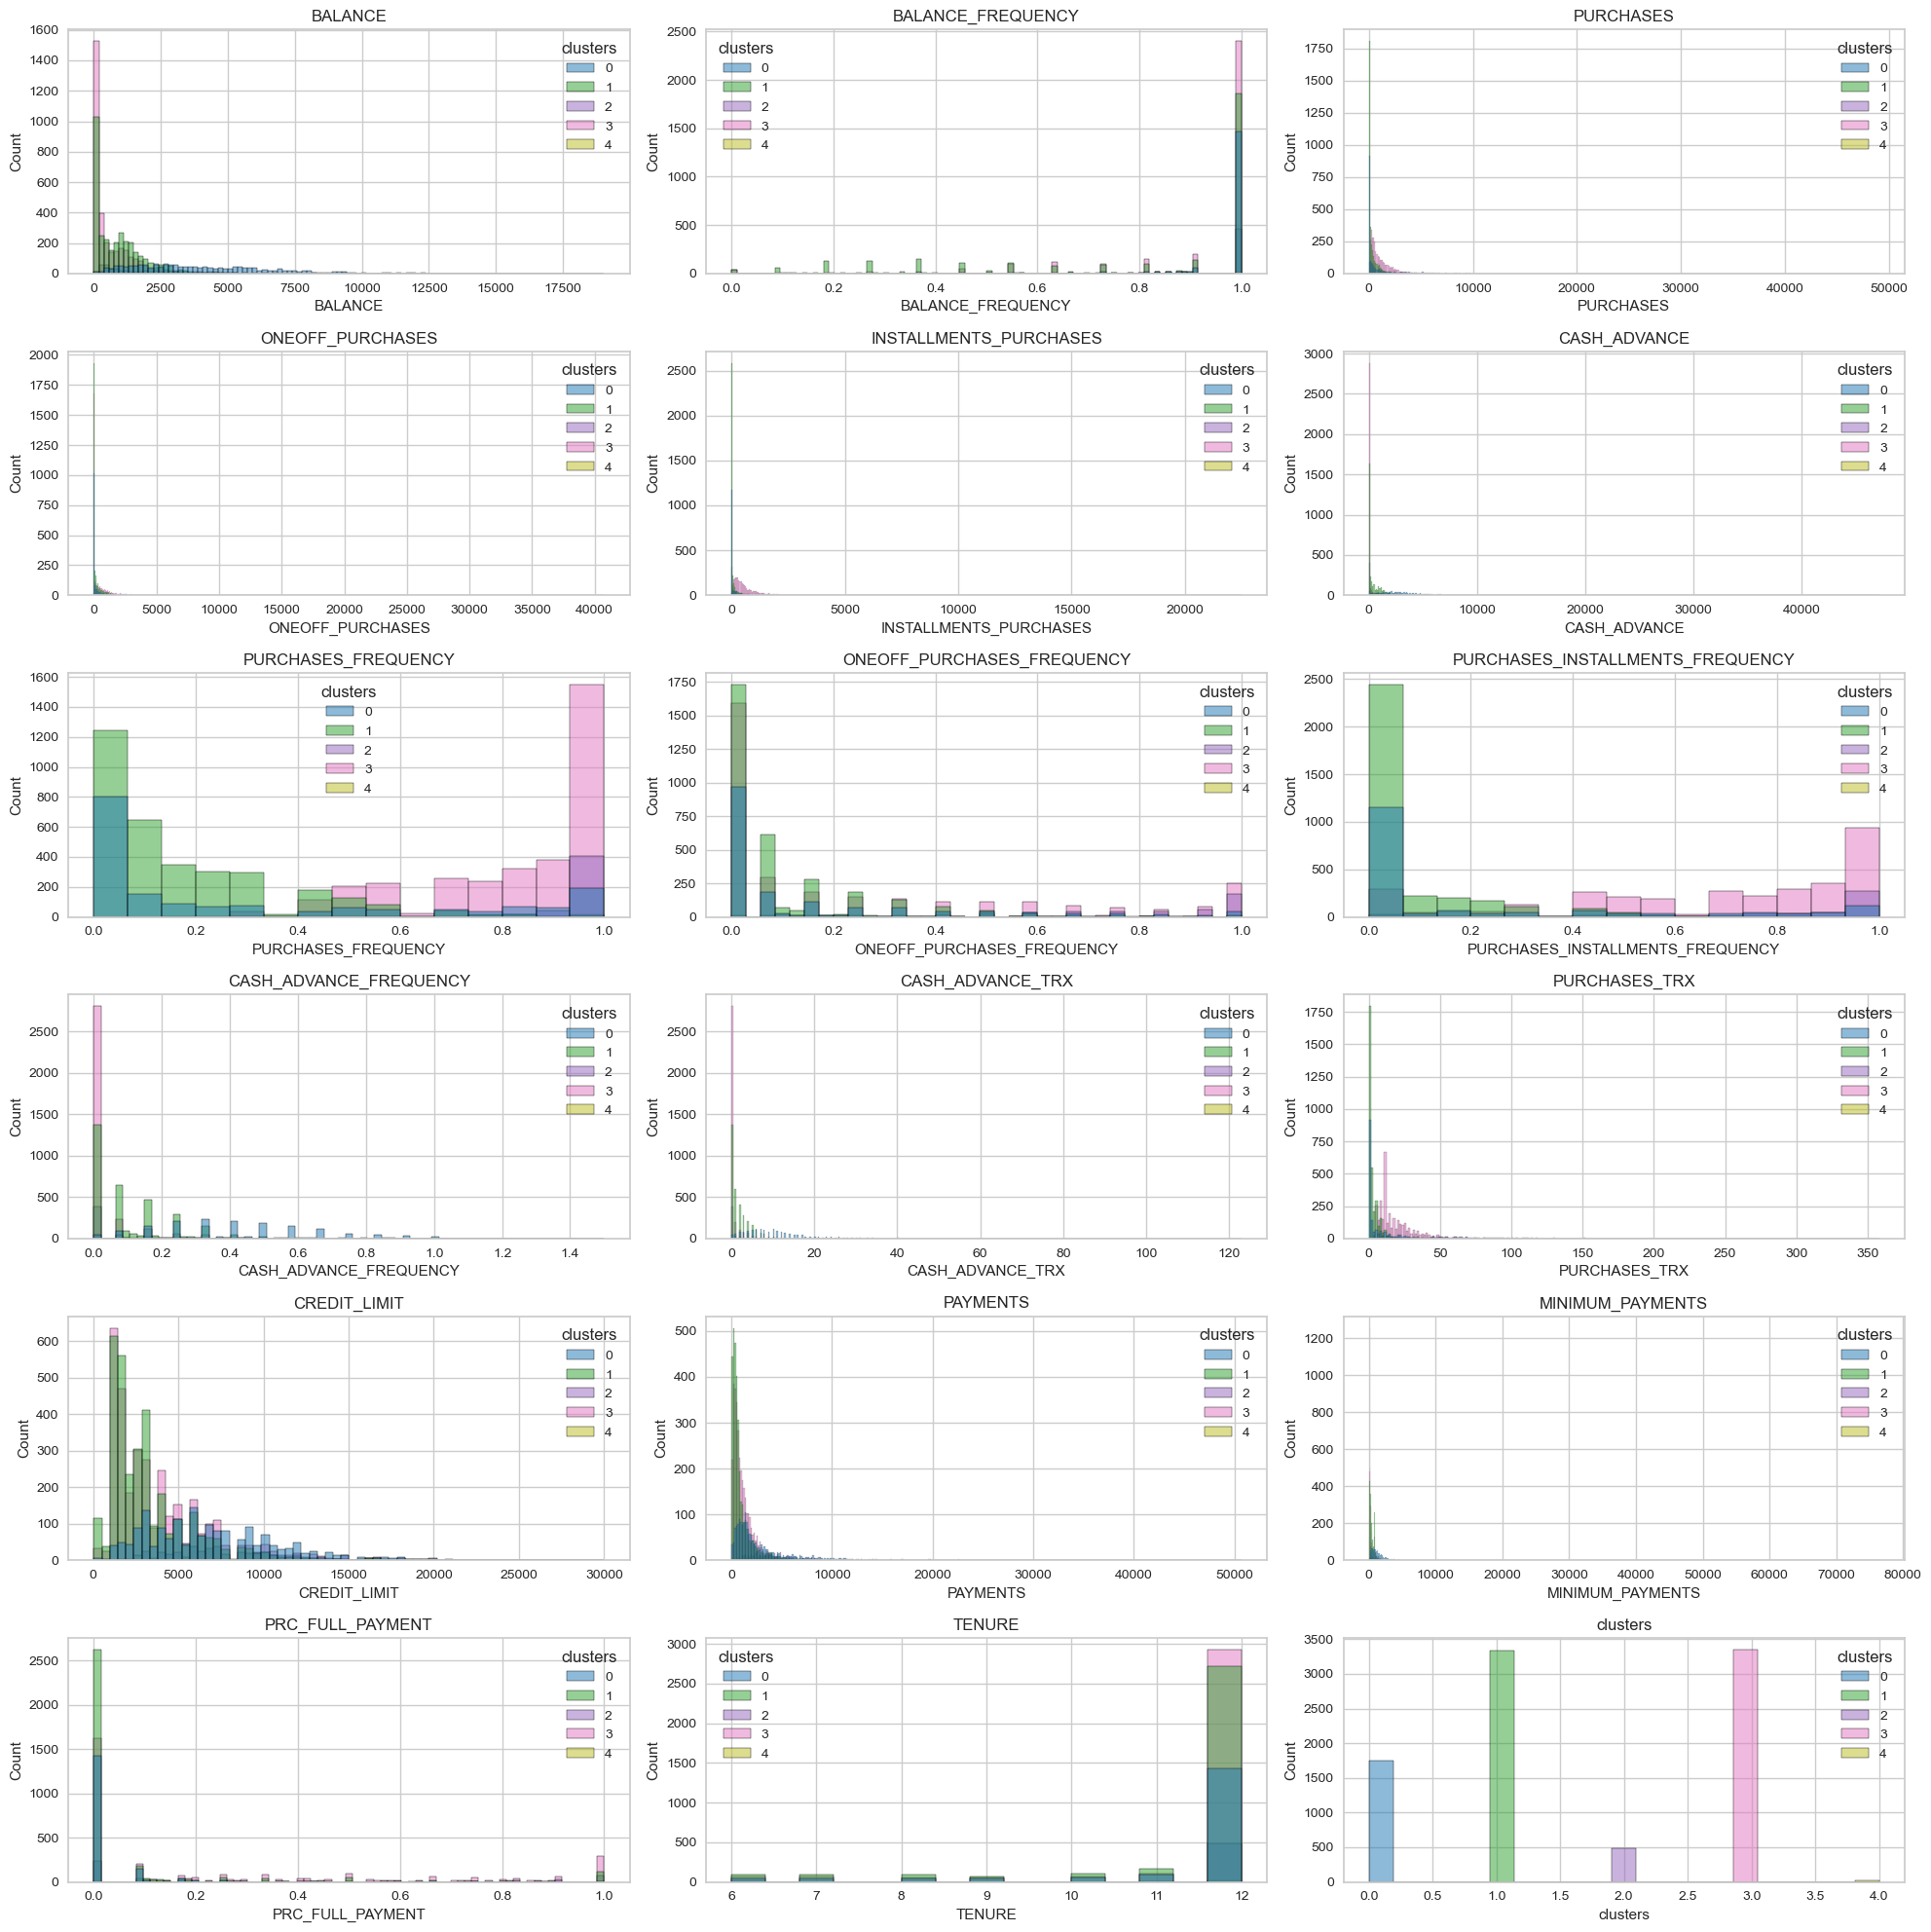

In [29]:
#viewing clusters distribution
fig, axs = plt.subplots(6, 3, figsize=(20, 20))
axs=axs.flatten()
plot_index=0
for col in df2:
    sns.histplot(data=df2, x=col, hue='clusters', ax=axs[plot_index], palette=custom_colors)
    axs[plot_index].set_title(col)
    plot_index += 1
plt.tight_layout()
plt.show()

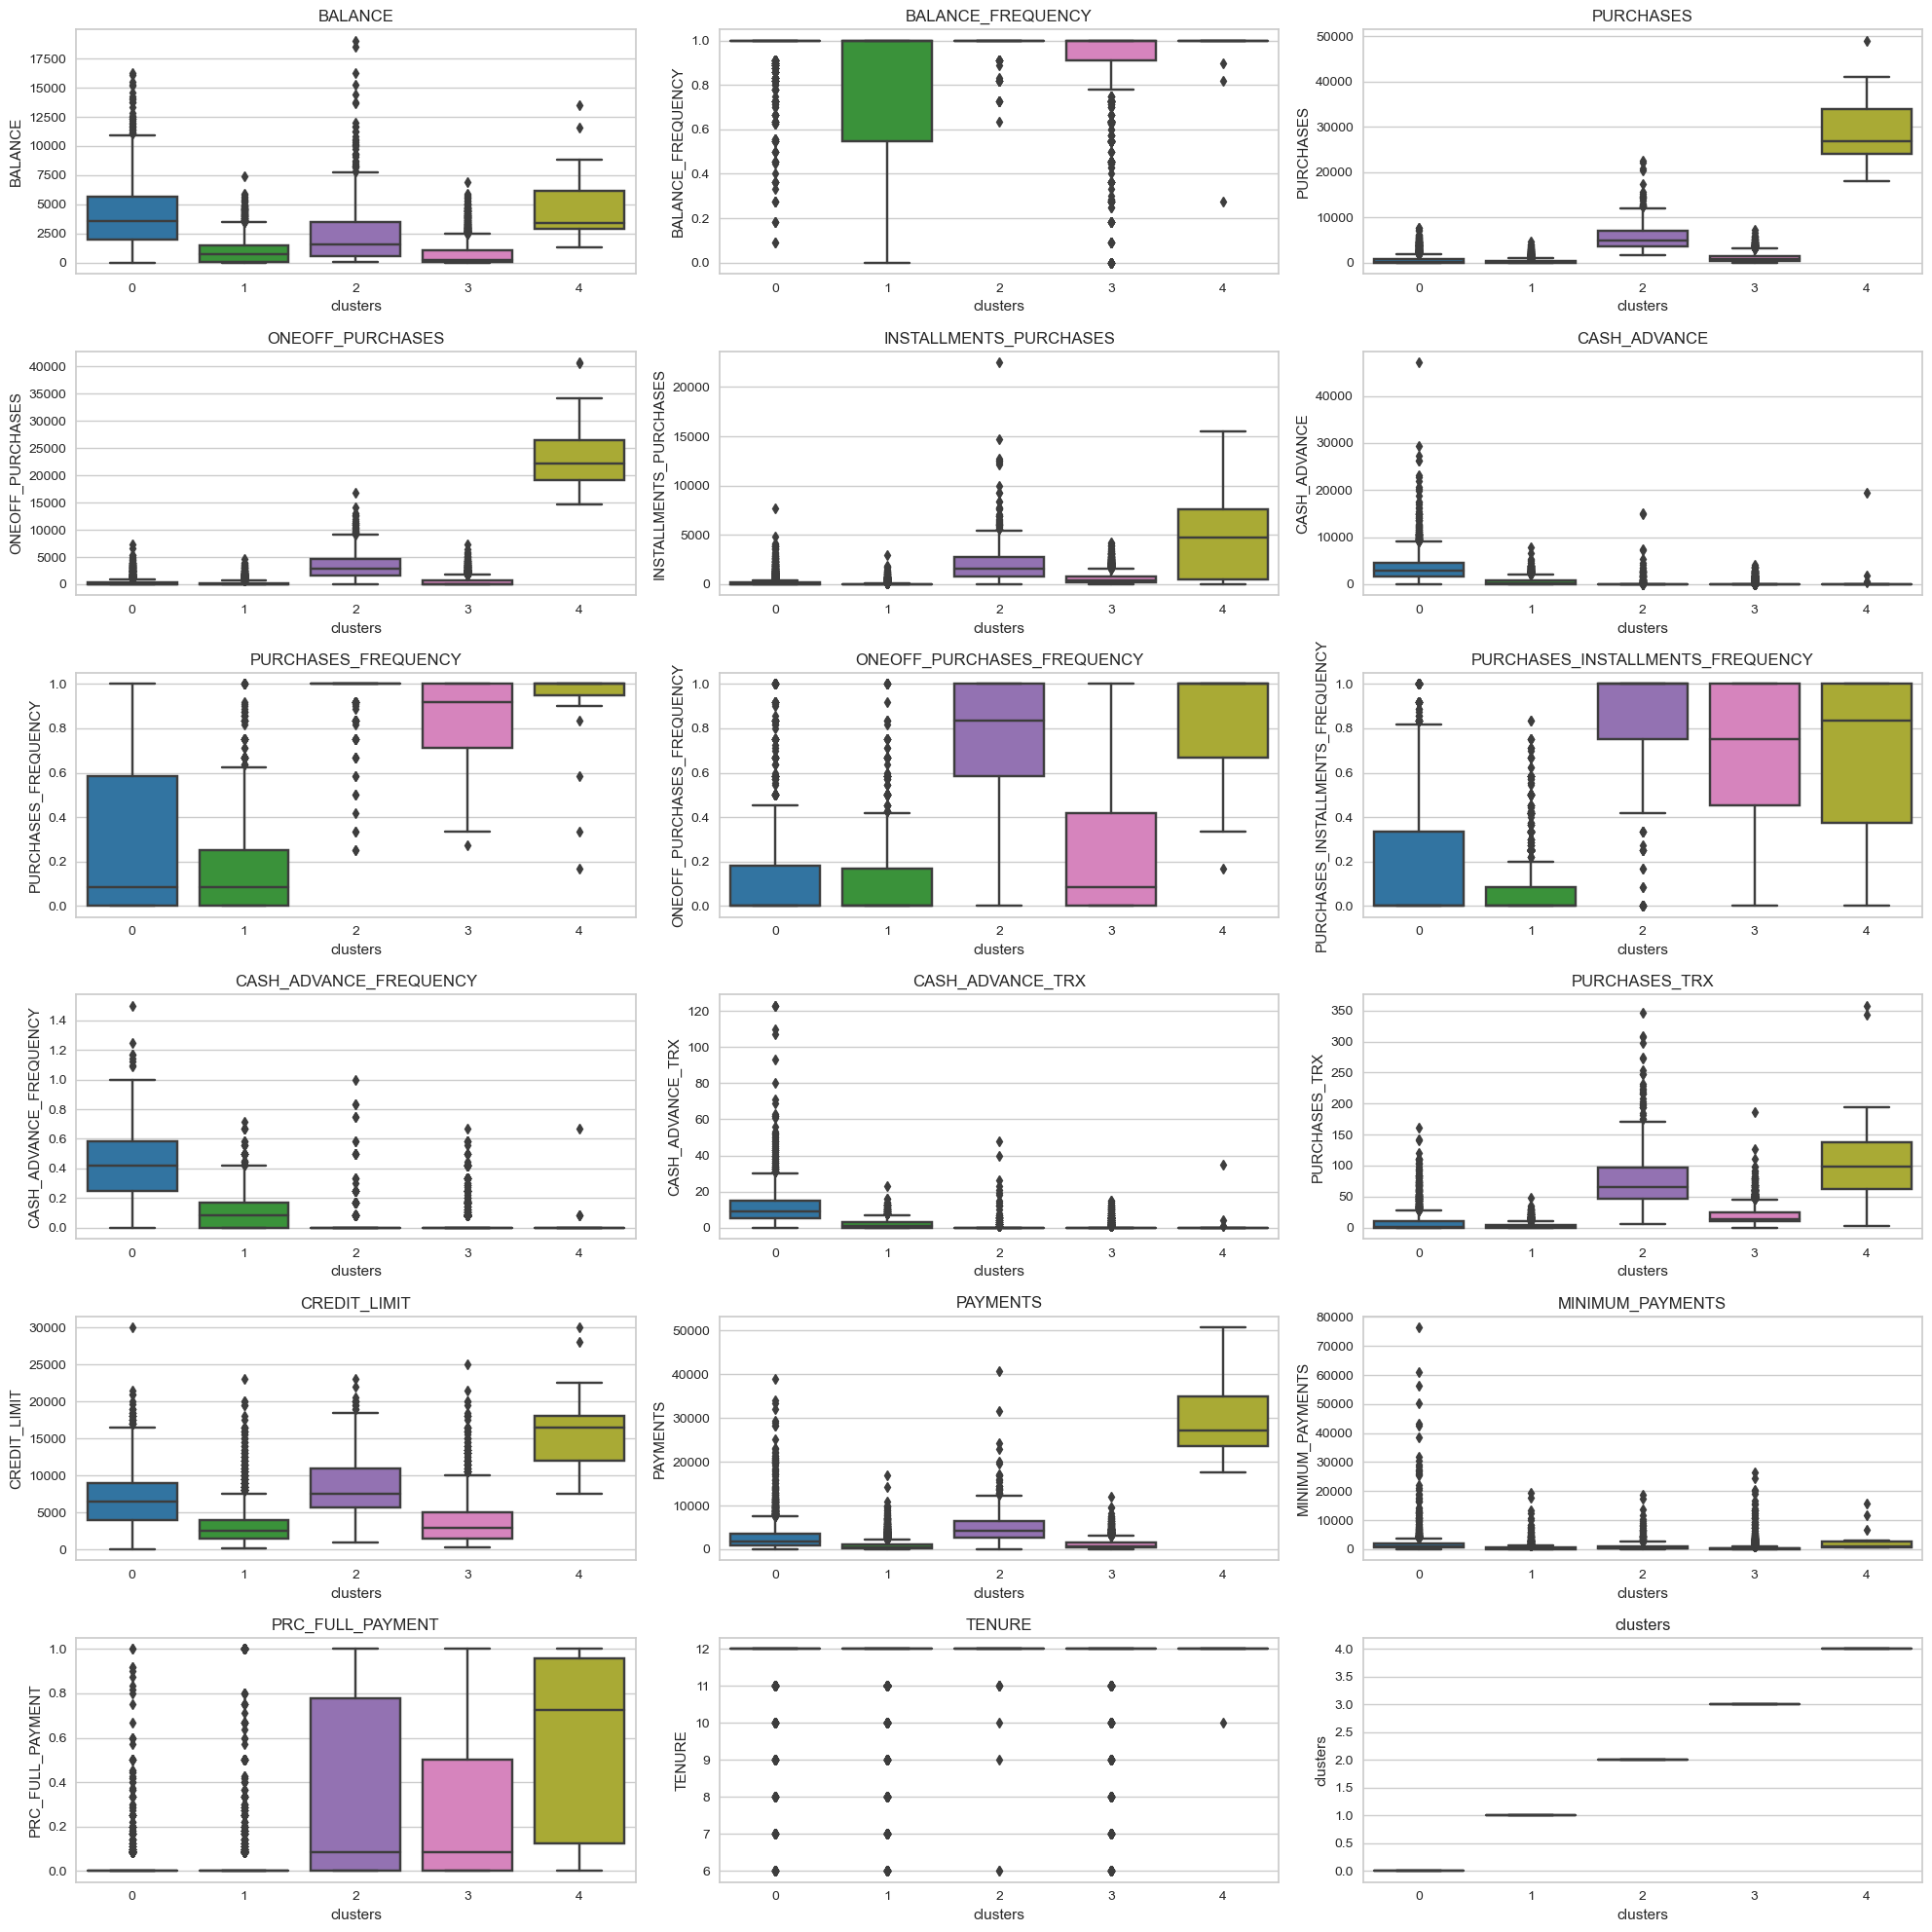

In [30]:
fig, axs = plt.subplots(6, 3, figsize=(20, 20))
axs=axs.flatten()
plot_index=0
for col in df2:
    sns.boxplot(data=df2, y=col, x='clusters', ax=axs[plot_index], palette=custom_colors)
    axs[plot_index].set_title(col)
    plot_index += 1
plt.tight_layout()
plt.show()

In [31]:
#calculating deviation from overall mean
X_mean = pd.concat([pd.DataFrame(df2.mean().drop('clusters'), columns=['mean']), 
                   df2.groupby('clusters').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

X_std_mean = pd.concat([pd.DataFrame(pca_df.mean().drop('clusters'), columns=['mean']), 
                   pca_df.groupby('clusters').mean().T], axis=1)

X_std_dev_rel = X_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel.drop(columns=['mean'], inplace=True)
X_std_mean.drop(columns=['mean'], inplace=True)

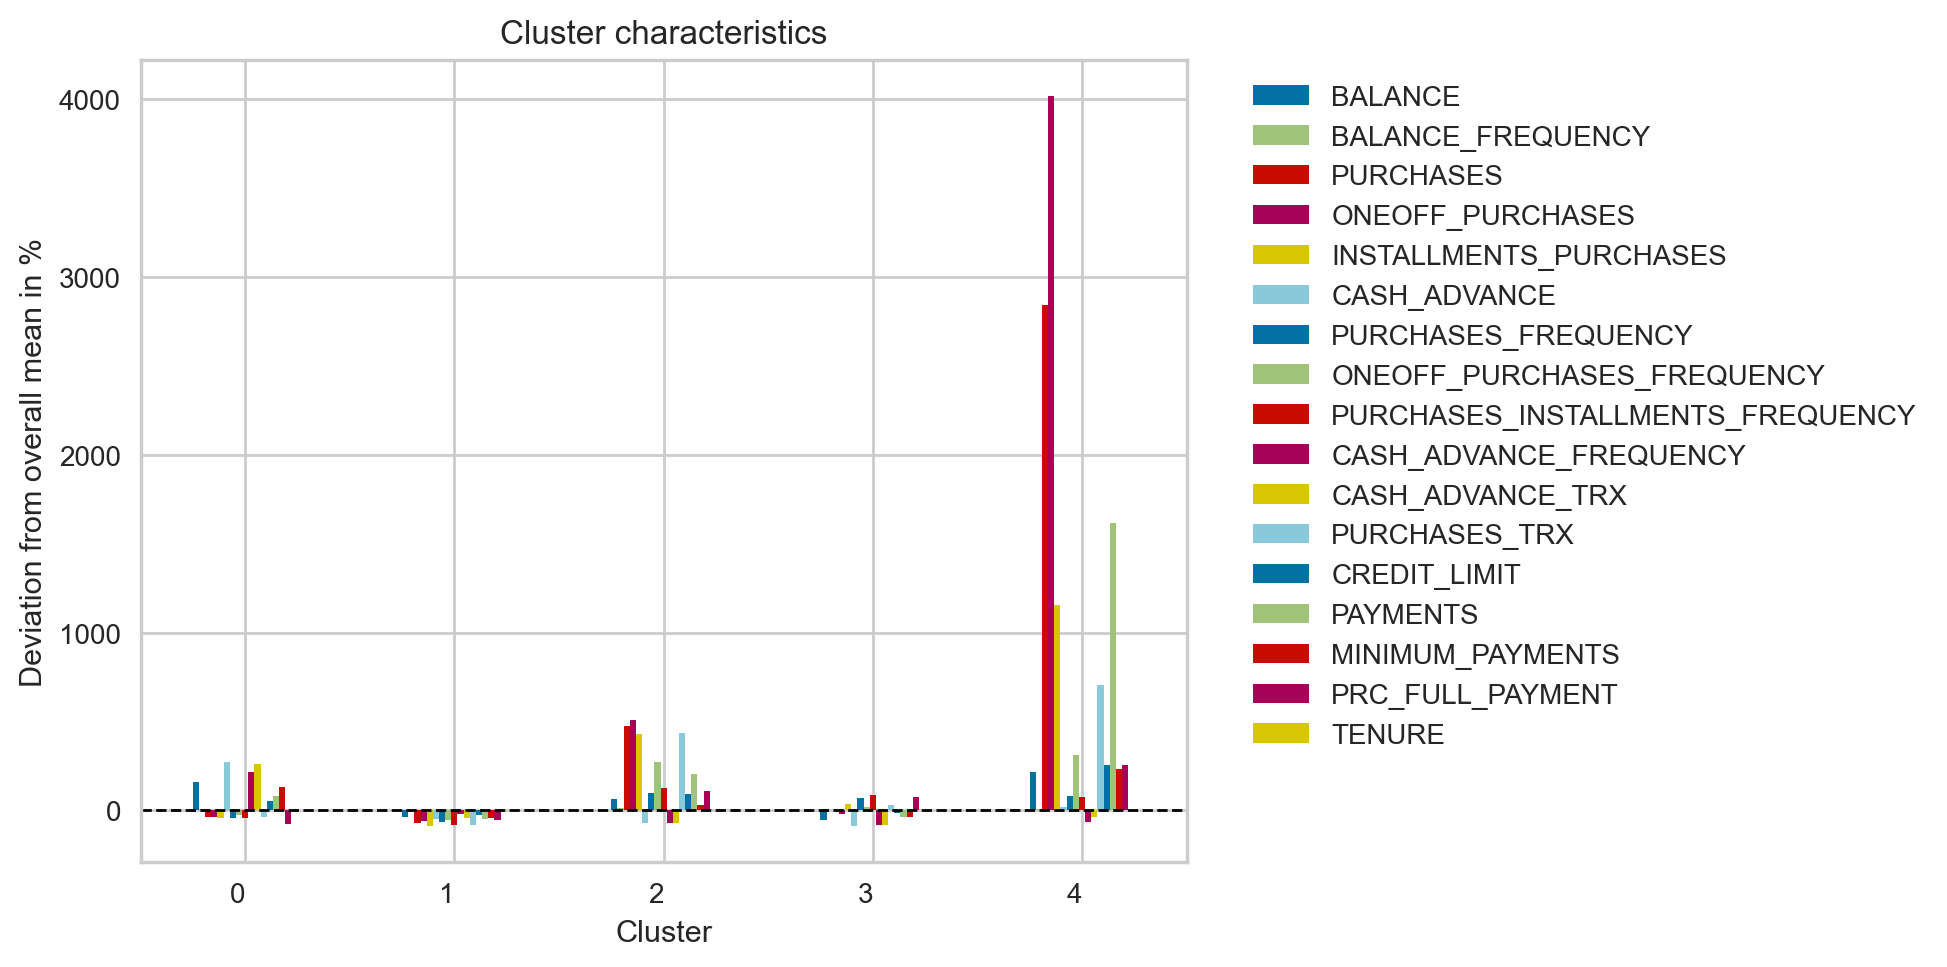

In [32]:
#summary of cluster characteristics
fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

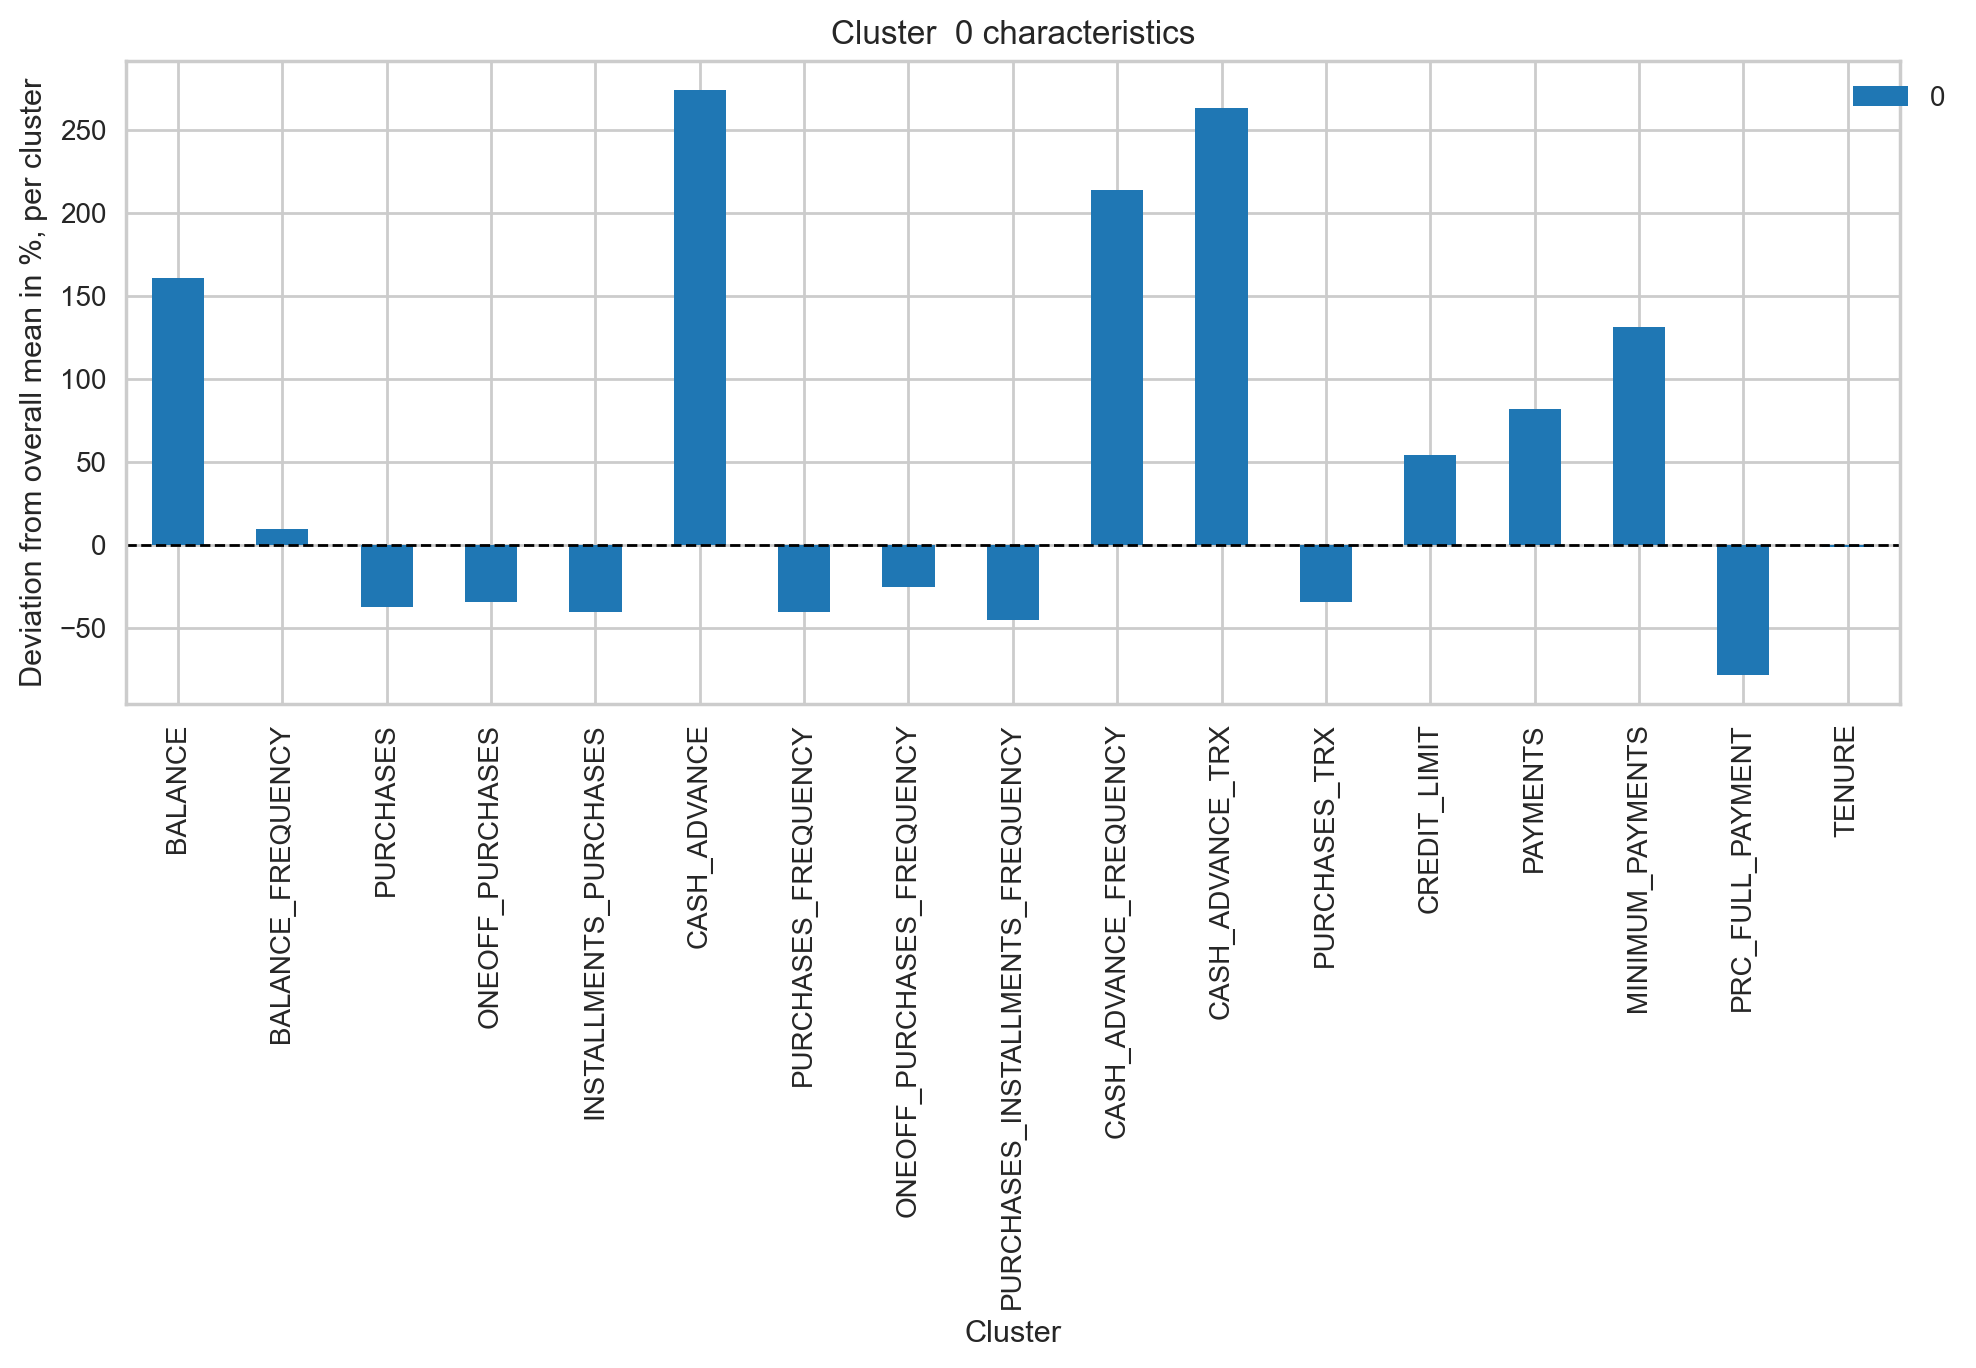

In [33]:
#summary of cluster 0
fig = plt.figure(figsize=(10,7), dpi=200)
X_dev_rel[0].T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster  0 characteristics", 
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %, per cluster",
                        color='#1f77b4'
          )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

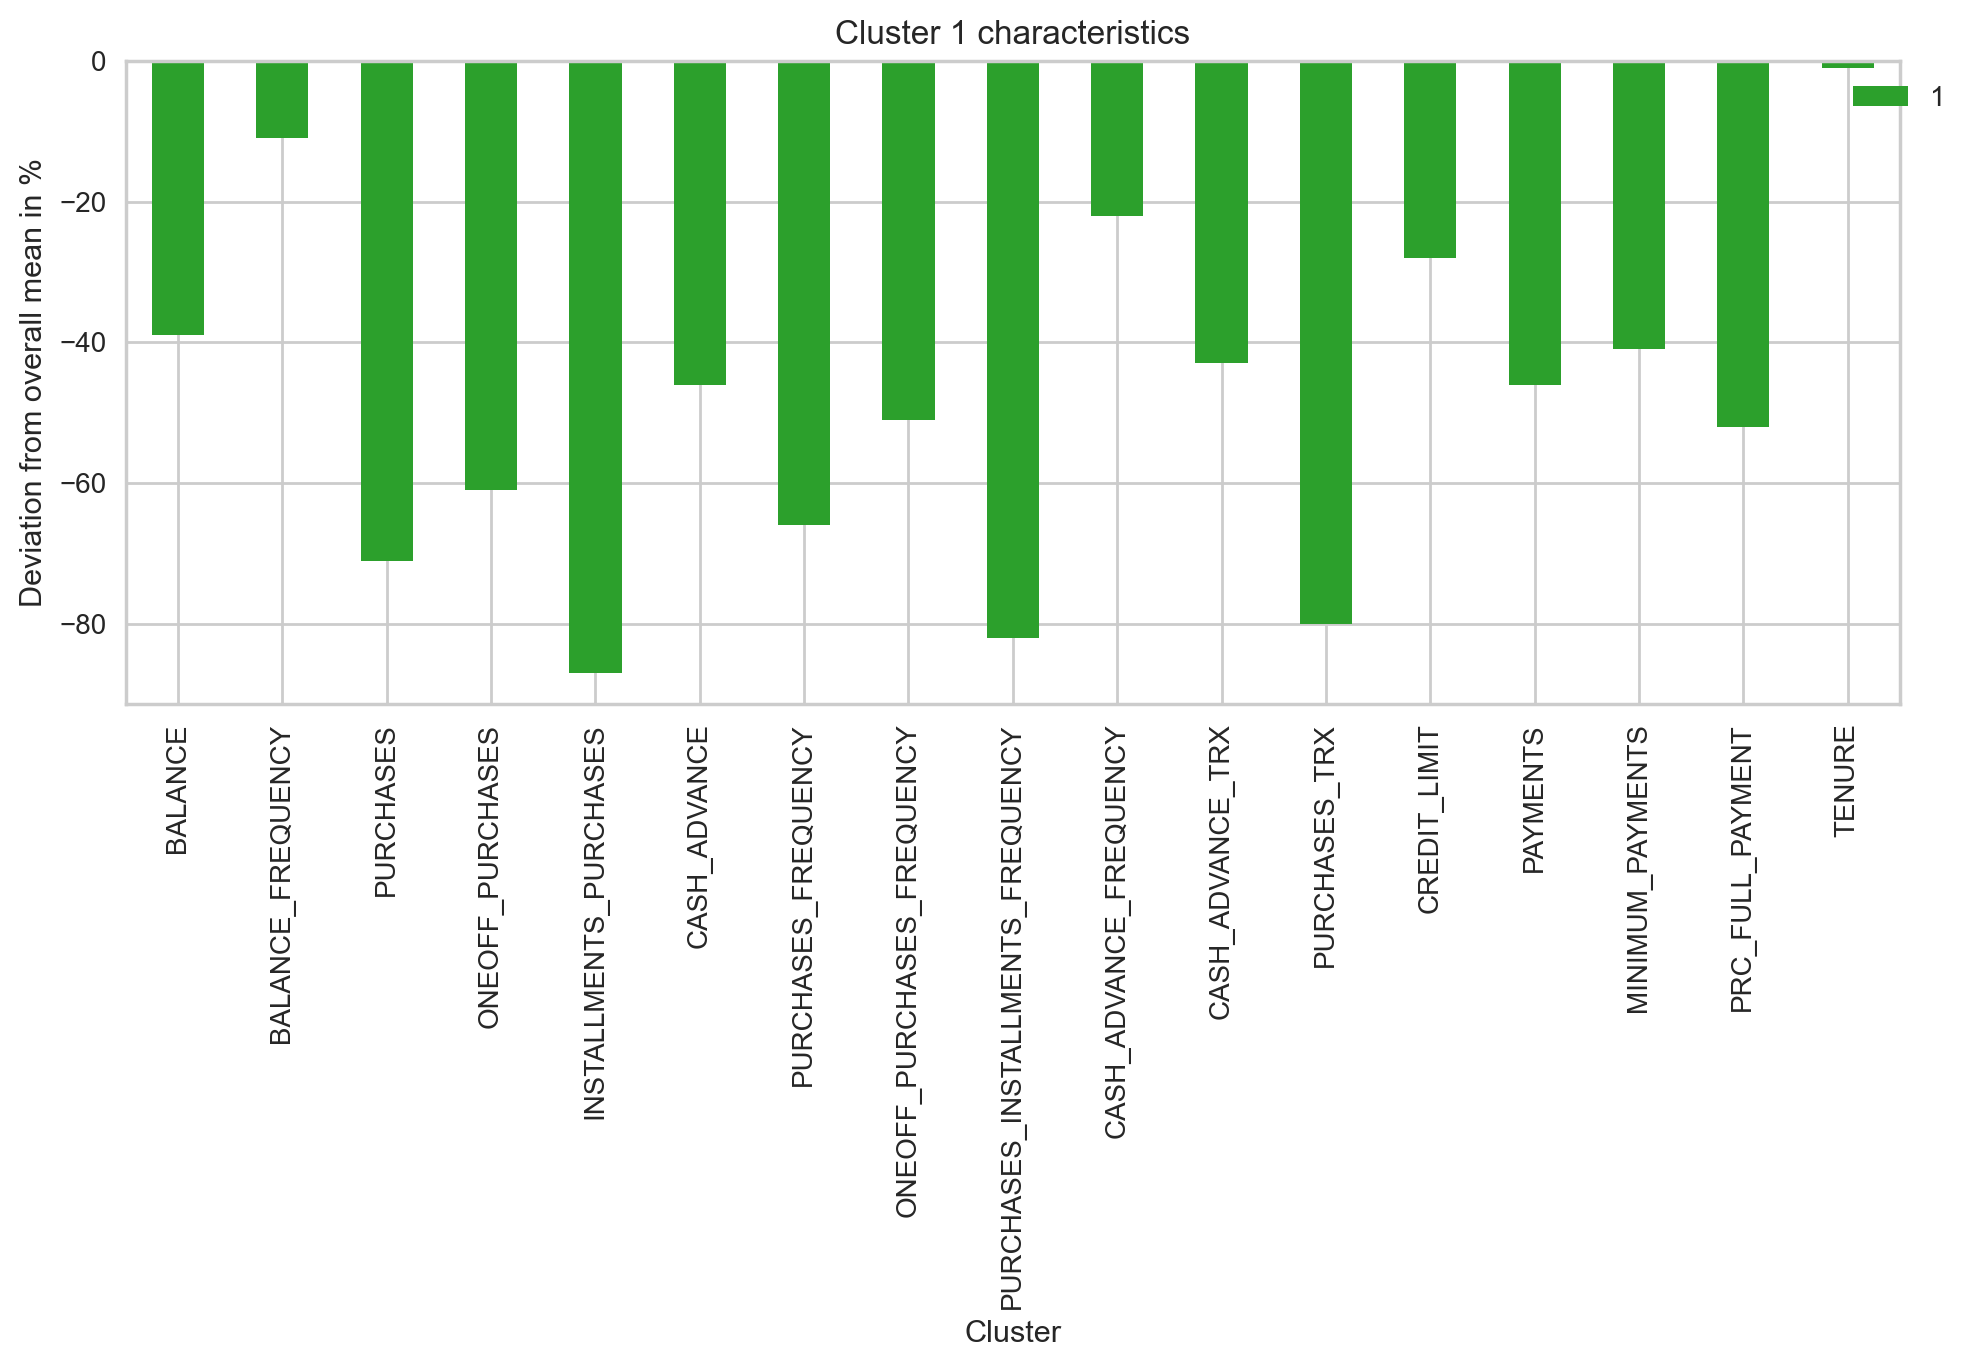

In [34]:
#summary of cluster 1
fig = plt.figure(figsize=(10,7), dpi=200)
X_dev_rel[1].T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster 1 characteristics", 
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %",
                    color='#2ca02c'
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

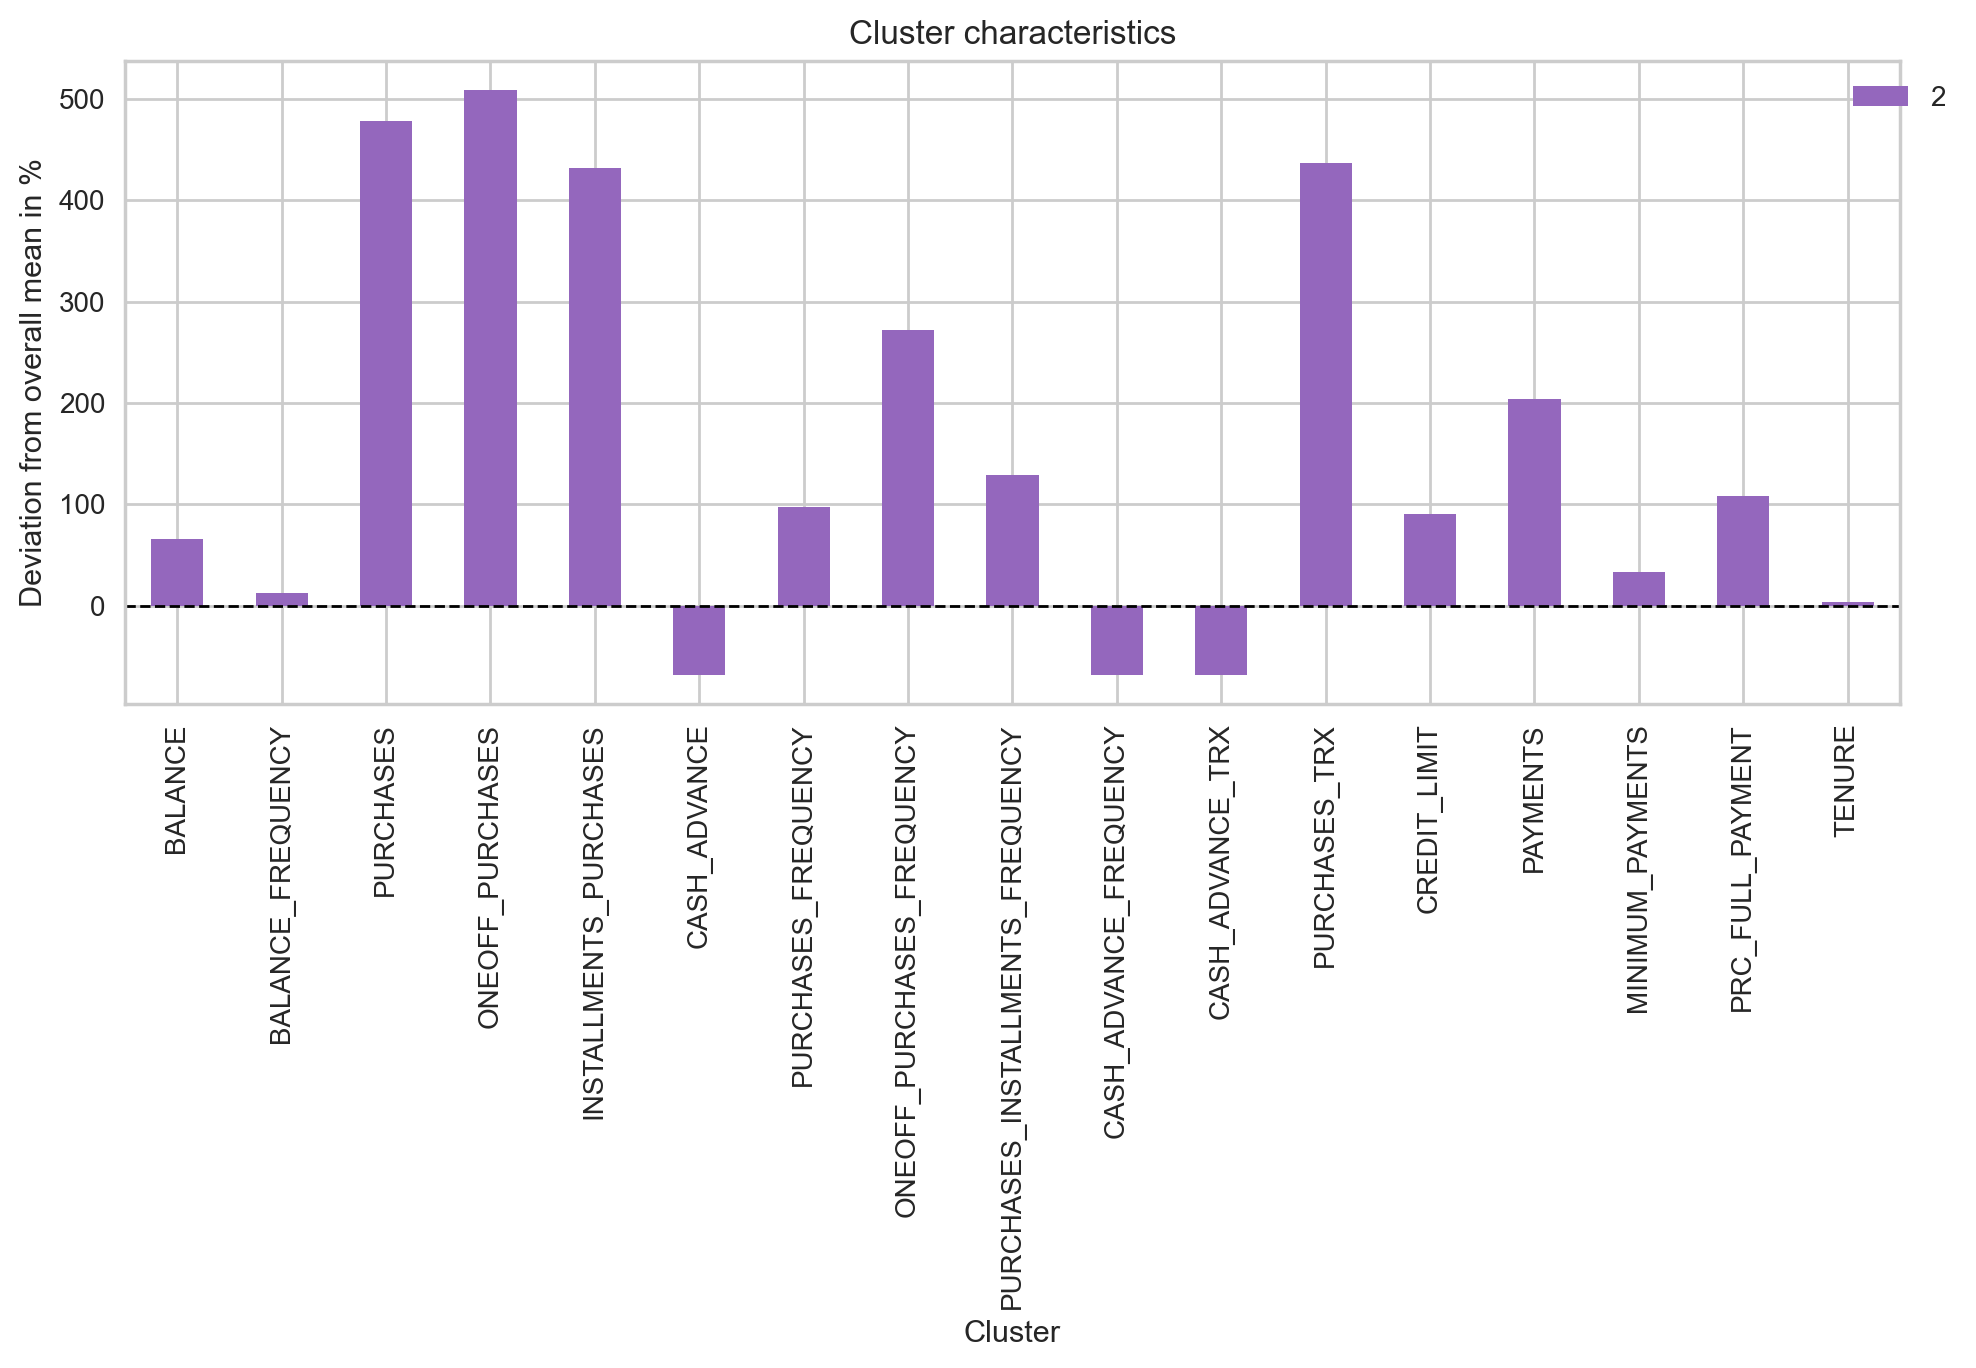

In [35]:
#summary of cluster 2
fig = plt.figure(figsize=(10,7), dpi=200)
X_dev_rel[2].T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %",
                    color='#9467bd'
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

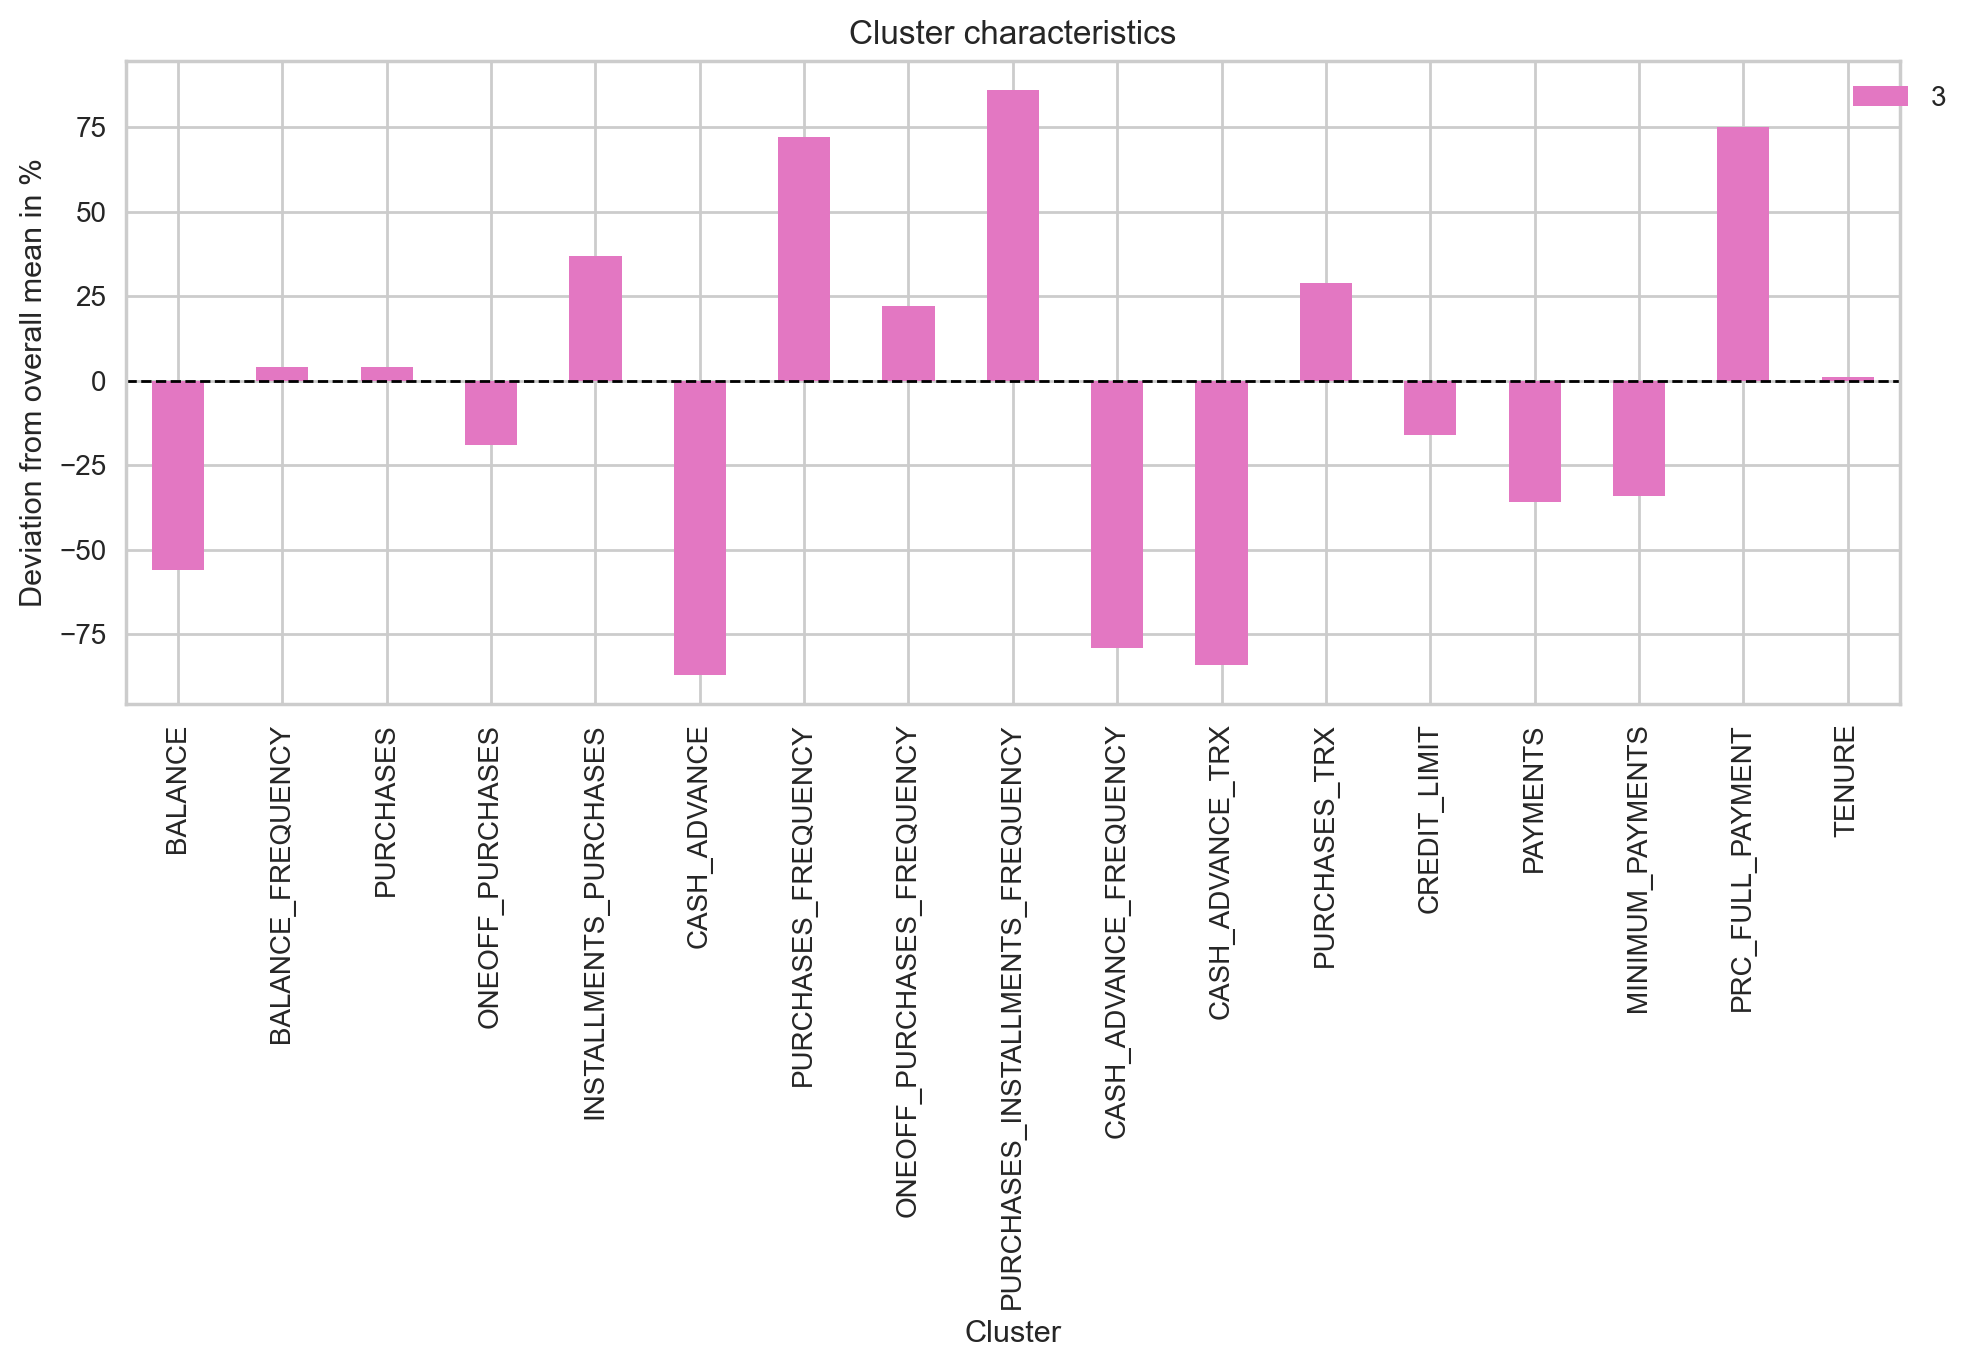

In [36]:
#summary of cluster 3
fig = plt.figure(figsize=(10,7), dpi=200)
X_dev_rel[3].T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %",
                    color='#e377c2'
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

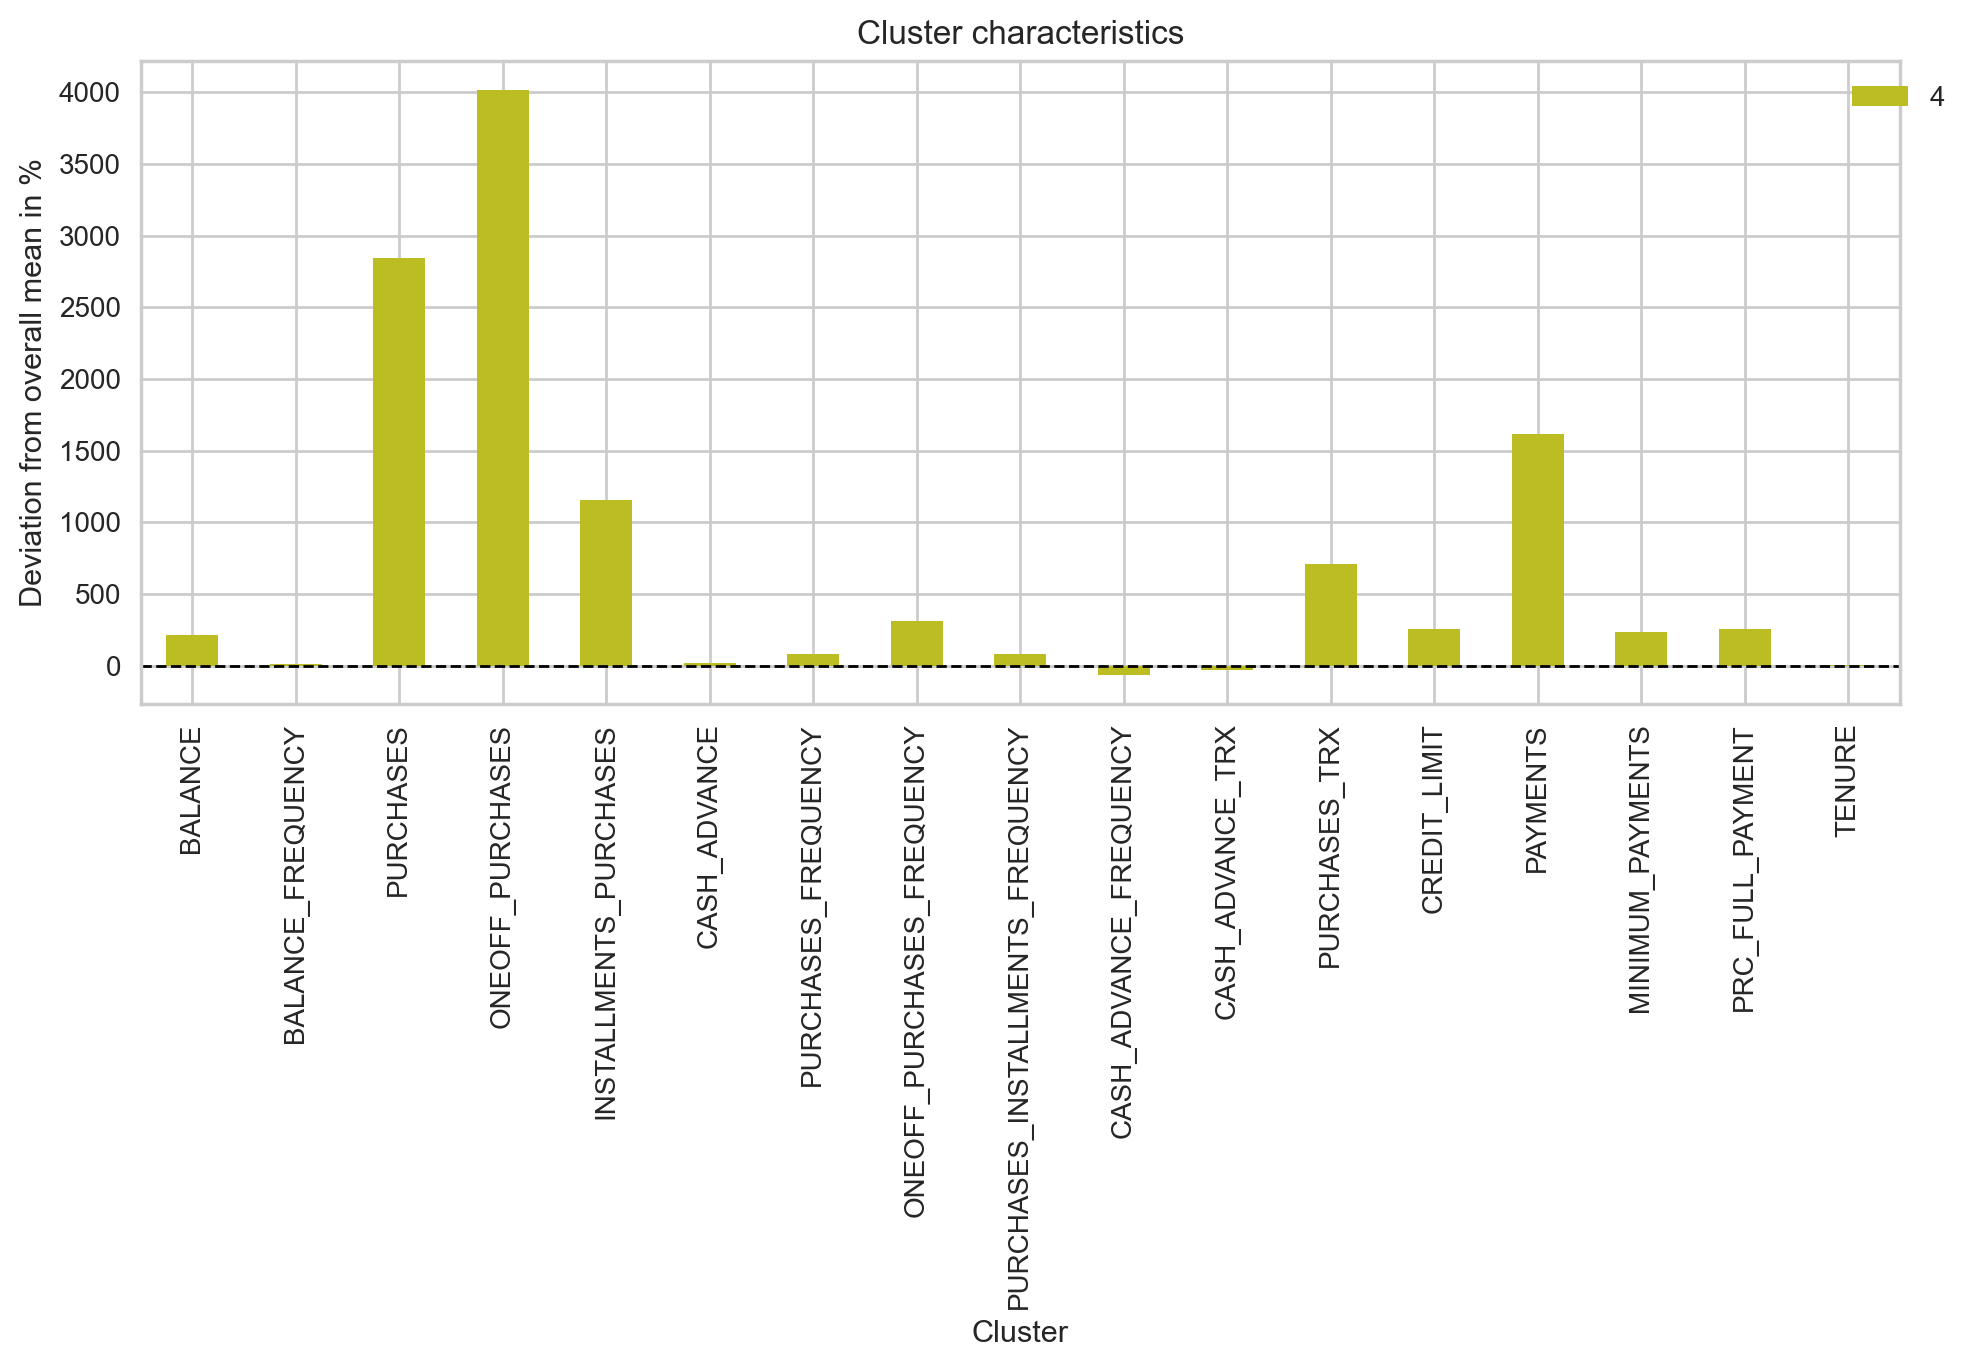

In [37]:
#summary of cluster 4
fig = plt.figure(figsize=(10,7), dpi=200)
X_dev_rel[4].T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %",
                    color='#bcbd22'
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

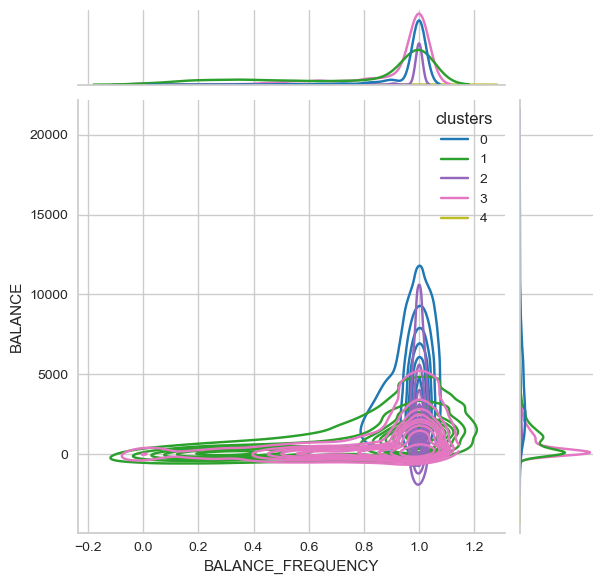

<Figure size 800x550 with 0 Axes>

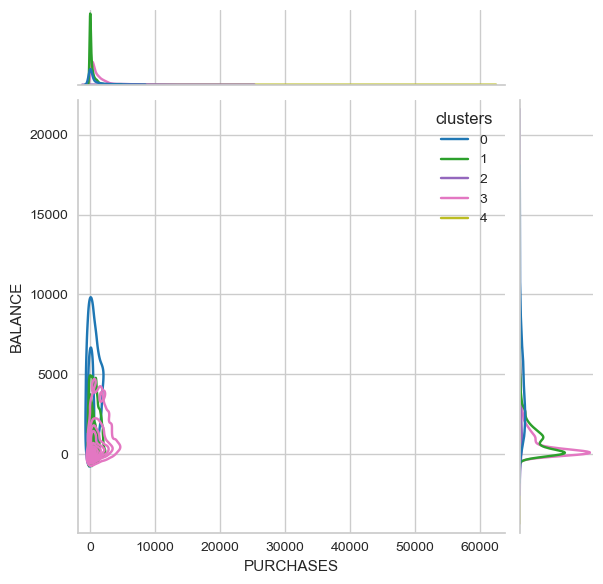

<Figure size 800x550 with 0 Axes>

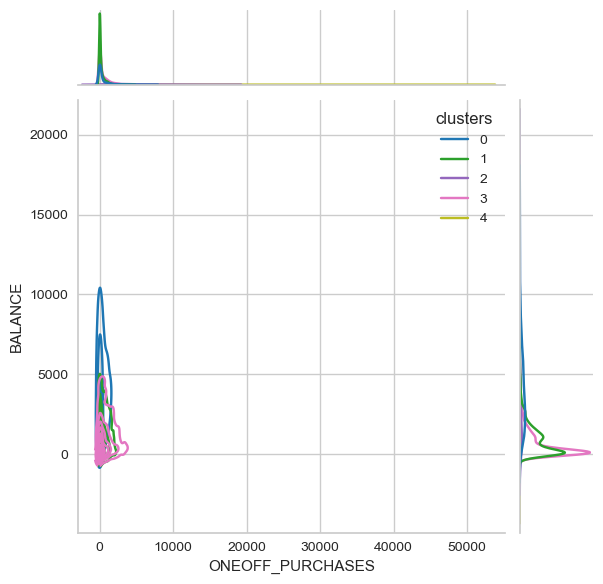

<Figure size 800x550 with 0 Axes>

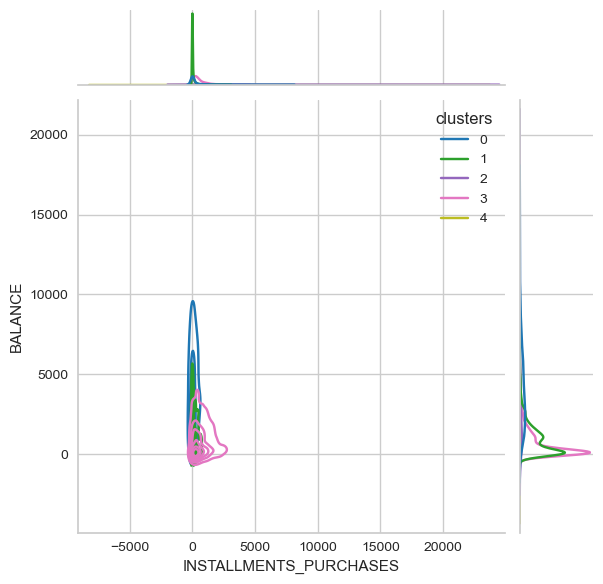

<Figure size 800x550 with 0 Axes>

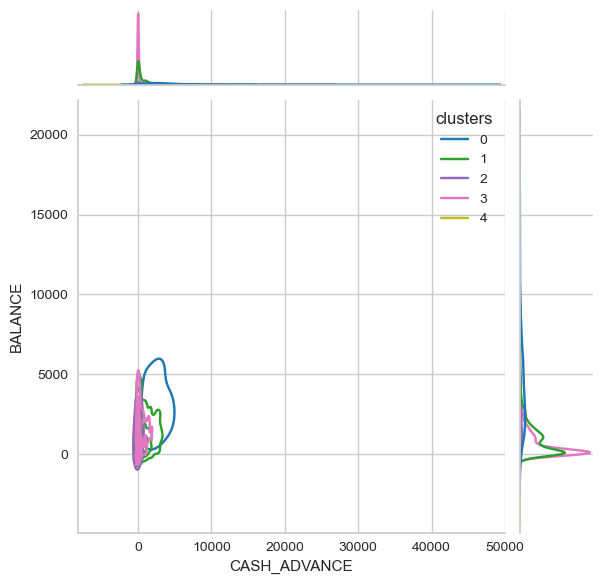

<Figure size 800x550 with 0 Axes>

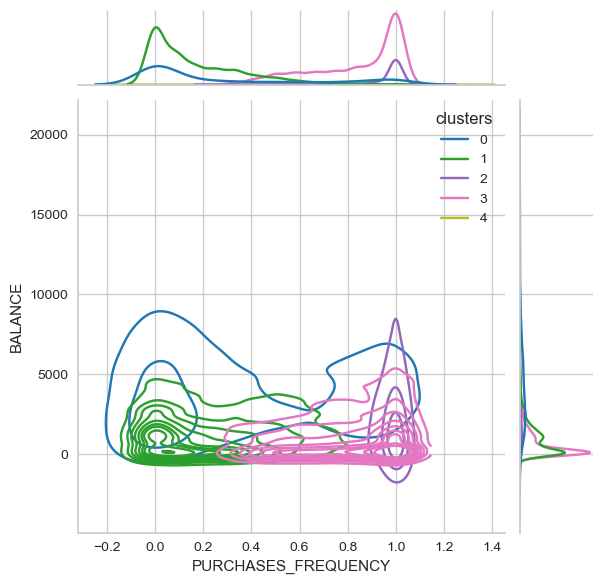

<Figure size 800x550 with 0 Axes>

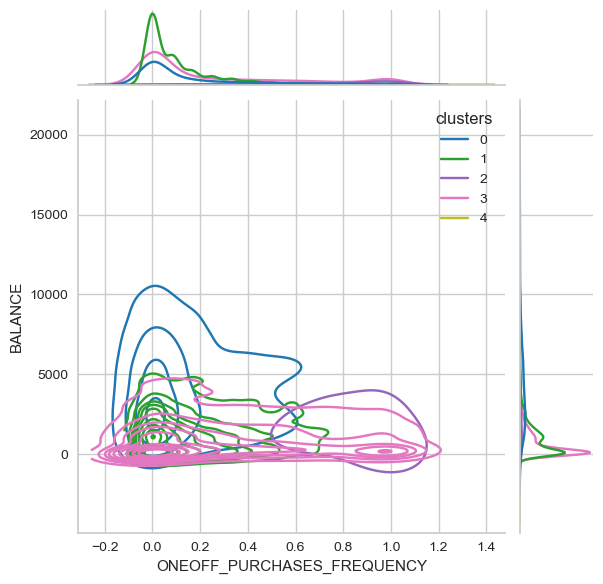

<Figure size 800x550 with 0 Axes>

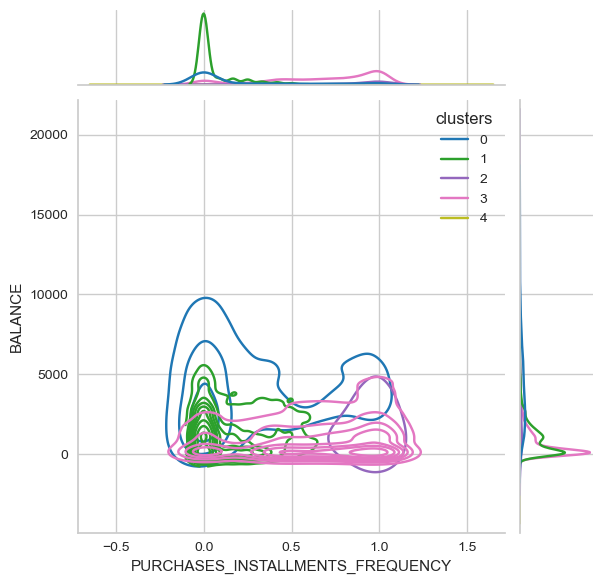

<Figure size 800x550 with 0 Axes>

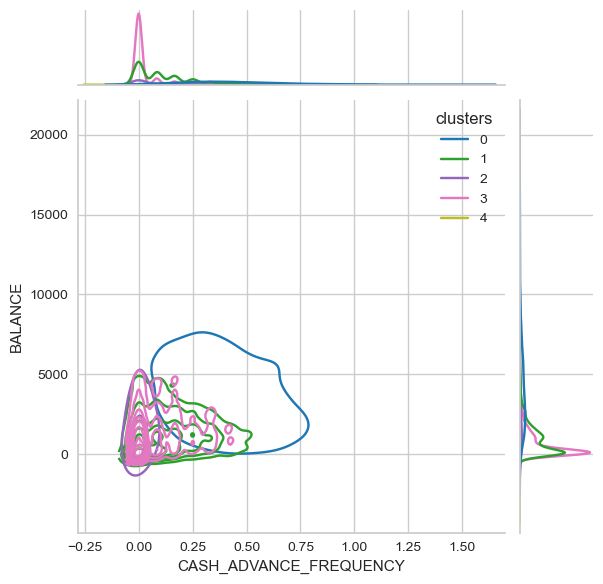

<Figure size 800x550 with 0 Axes>

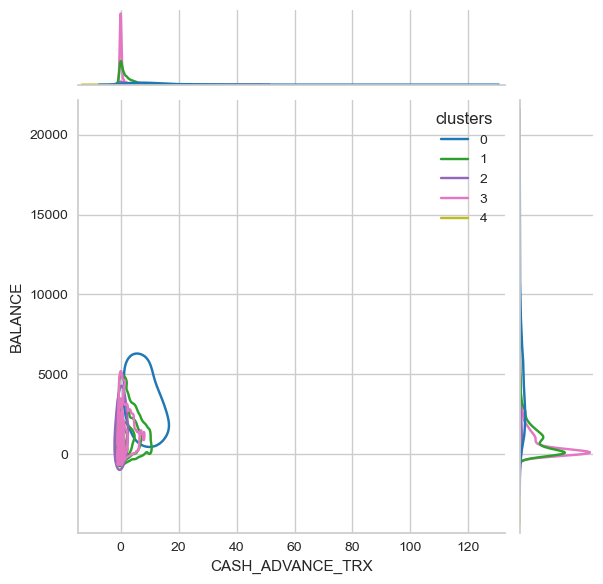

<Figure size 800x550 with 0 Axes>

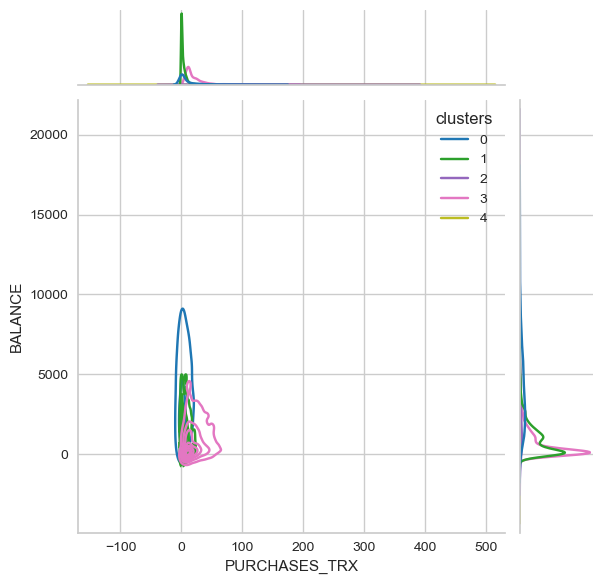

<Figure size 800x550 with 0 Axes>

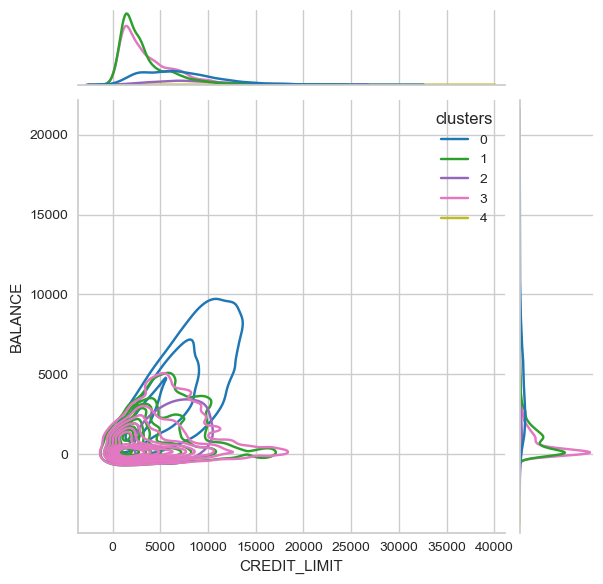

<Figure size 800x550 with 0 Axes>

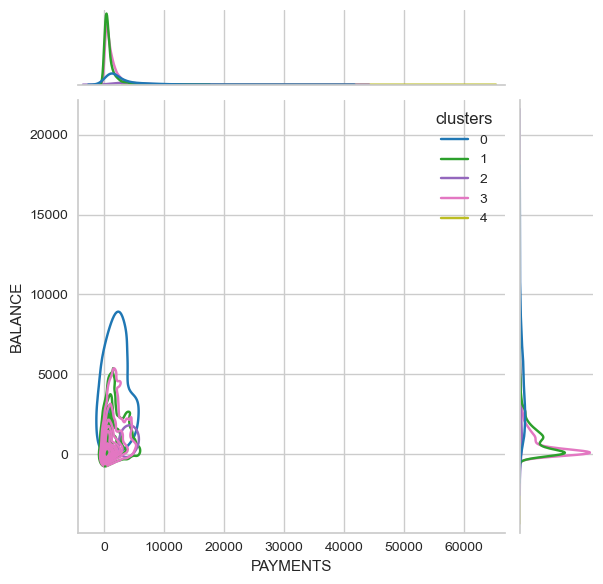

<Figure size 800x550 with 0 Axes>

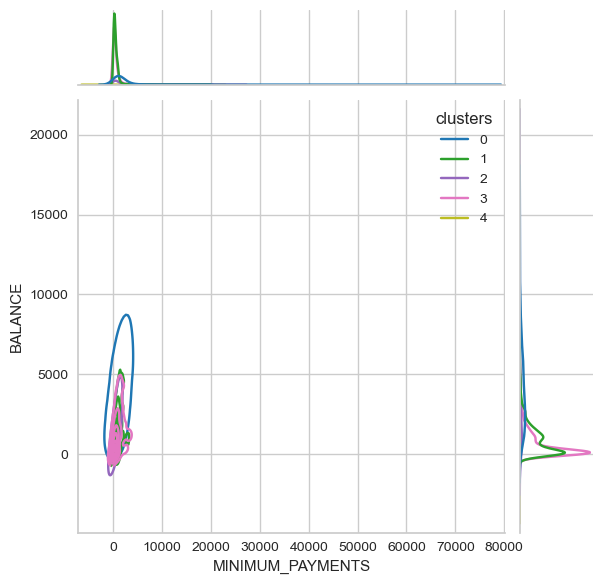

<Figure size 800x550 with 0 Axes>

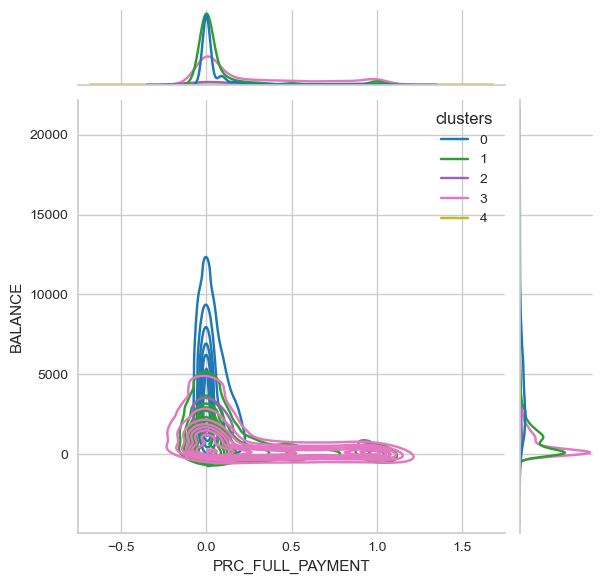

<Figure size 800x550 with 0 Axes>

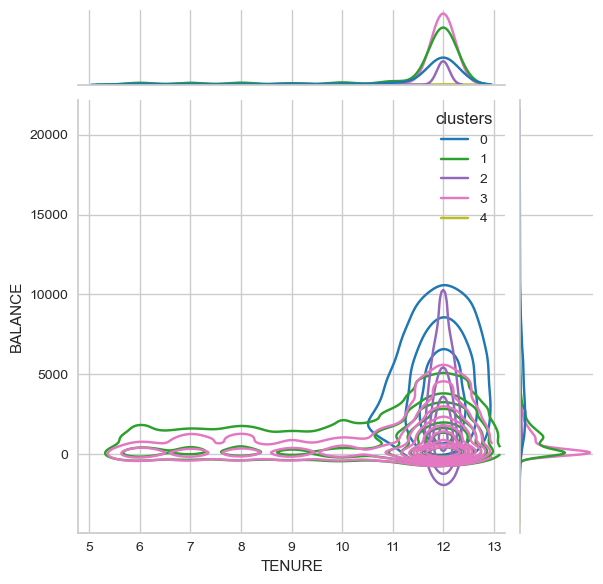

In [38]:
#using jointplot as another cluster visualization tool 
for col in df2:
    if col != 'clusters' and col != 'BALANCE':
        plt.figure()
        sns.jointplot(x=df2[col], y=df2['BALANCE'], hue=df2['clusters'], kind='kde', palette=custom_colors)
        plt.show()

### Cluster Profiling

Cluster 0 - blue
- Highest monthly balance
- Most cash advances
- Does not make purchases frequently 
- High cash advance frequency 
- High cash advance transactions
- Many outliers with high minimum payments
- minimum payments usually made
- Does not usually pay off card in full
- High balance frequency 
- Has had the card for the longest


Cluster 1 - green
- Does not make purchases frequently
- Low credit limit
- Relatively low balance
- Does not make payments in installments 
- Not many purchase transactions or payments
- Low amount of minimum payments made
- Does not make large purchases


Cluster 2 - the biggest group - purple
- High one-off purchase frequency 
- High purchase installment frequency
- Many purchase transactions
- High prc of full payments made
- High credit limit
- Low balance frequency
- Most often makes purchases out of all the clusters
- Makes large purchases


Cluster 3 - pink
- Lowest monthly balance
- Low credit limit
- Almost never gets cash advances 
- Relatively high prc full payment
- High purchase frequency 


Cluster 4 - yellow
- Makes the most purchases
- Makes the most one-off purchases
- Makes the most installment purchases
- The most purchase transactions
- High credit limit
- Most payments made 
- Usually pays in full 
- Makes many payments 


##### Thoughts
If I had to provide further analysis or wanted to play around with different visualizations, I would like to make a radar chart that summarized the means of each feature. I could also try different clustering methods as well as different preprocessing strategies such as removing outliers. 

##### Sources
* What is Agglomerative clustering and how to use it with Python Scikit-learn: https://medium.com/datadenys/what-is-agglomerative-clustering-and-how-to-use-it-with-python-scikit-learn-7e127ddb148c
* Best Practices for Visualizing Your Cluster Results:
https://towardsdatascience.com/best-practices-for-visualizing-your-cluster-results-20a3baac7426